##  Evalue la qualité de la prédiction d'un modèle / d'une config en regards des métriques obtenues sur différents pas de temps

In [1]:
# GET PARAMETERS
import os 
import sys
# Get Parent folder : 
current_path = os.getcwd()
parent_dir = os.path.abspath(os.path.join(current_path, '..'))
if parent_dir not in sys.path:
    sys.path.insert(0, parent_dir)

from examples.train_and_visu_non_recurrent import evaluate_config
from plotting.plotting import error_per_station_calendar_pattern
from examples.train_model_on_k_fold_validation import load_configuration

Training and Hyper-parameter tuning with Ray is not possible


## Load Config from HP tuning
```trial_id = 'subway_in_STGCN_MSELoss_2025_01_06_08_00_94523'
# "subway_in_netmob_POIs_STGCN_VariableSelectionNetwork_MSELoss_2025_01_07_23_12_41192"
# "subway_in_subway_out_STGCN_VariableSelectionNetwork_MSELoss_2025_01_06_02_04_17963"
# 'subway_in_netmob_POIs_STGCN_VariableSelectionNetwork_MSELoss_2025_01_07_05_04_80480'
# "subway_in_STGCN_MSELoss_2025_01_06_08_00_94523"
args_best_model,_ = load_configuration(trial_id,load_config=True,epochs=None)

Trial id:  subway_in_netmob_POIs_STGCN_VariableSelectionNetwork_MSELoss_2025_01_07_23_12_41192

>>>> Load best CONFIG



Init Dataset:  torch.Size([7392, 40])
Number of Nan Value:  tensor(0)
Total Number of Elements:  295680 

U/Utarget size: torch.Size([3420, 40, 7])/torch.Size([3420, 40, 1]) Train/Valid/Test 2052 684 683
Spatial unit:  AMP
U/Utarget size: torch.Size([3420, 34, 7])/torch.Size([3420, 34, 1]) Train/Valid/Test 2052 684 683
Spatial unit:  BEL
U/Utarget size: torch.Size([3420, 36, 7])/torch.Size([3420, 36, 1]) Train/Valid/Test 2052 684 683
Spatial unit:  BRO
U/Utarget size: torch.Size([3420, 30, 7])/torch.Size([3420, 30, 1]) Train/Valid/Test 2052 684 683
Spatial unit:  COR
U/Utarget size: torch.Size([3420, 39, 7])/torch.Size([3420, 39, 1]) Train/Valid/Test 2052 684 683
Spatial unit:  CUI
U/Utarget size: torch.Size([3420, 67, 7])/torch.Size([3420, 67, 1]) Train/Valid/Test 2052 684 683
Spatial unit:  CUS
U/Utarget size: torch.Size([3420, 21, 7])/torch.Size([3420, 21, 1]) Train/Valid/Test 2052 684 683
Spatial unit:  FLA
U/Utarget size: torch.Size([3420, 32, 7])/torch.Size([3420, 32, 1]) Train/

/root/anaconda3/envs/pytorch-2.0.1/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:152: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


epoch: 0 
 min\epoch : 0.08
Estimated time for training: 5.1min 

Training Throughput:491.14 sequences per seconds
>>> Training complete in: 0:04:00.877060
>>> Training performance time: min 0.055219411849975586 avg 0.062403202056884766 seconds (+/- 0.0038827651519539176)
>>> Loading performance time: min 0.002760648727416992 avg 0.04574315437239132 seconds (+/- 0.10476850748396424)
>>> Forward performance time: 0.023264848530040242 seconds (+/- 0.0012643824586845403)
>>> Backward performance time: 0.03397861954431068 seconds (+/- 0.003498816375420792)
>>> Plotting performance time: 3.997725669783775e-06 seconds (+/- 8.435486237018366e-06)
>>> Saving performance time: 0.8599941608233329 seconds (+/- 0.1446324147628904)
>>> PI-tracking performance time: 7.195906205610796e-06 seconds (+/- 4.706970439196394e-06)
>>> Scheduler-update performance time: 4.455778333875868e-05 seconds (+/- 2.157838523050784e-05)
>>> Peak Power during training: 108.848 W)
>>> Validation time: 0:00:00.227916
Pro

Loading BokehJS ...

Loading BokehJS ...

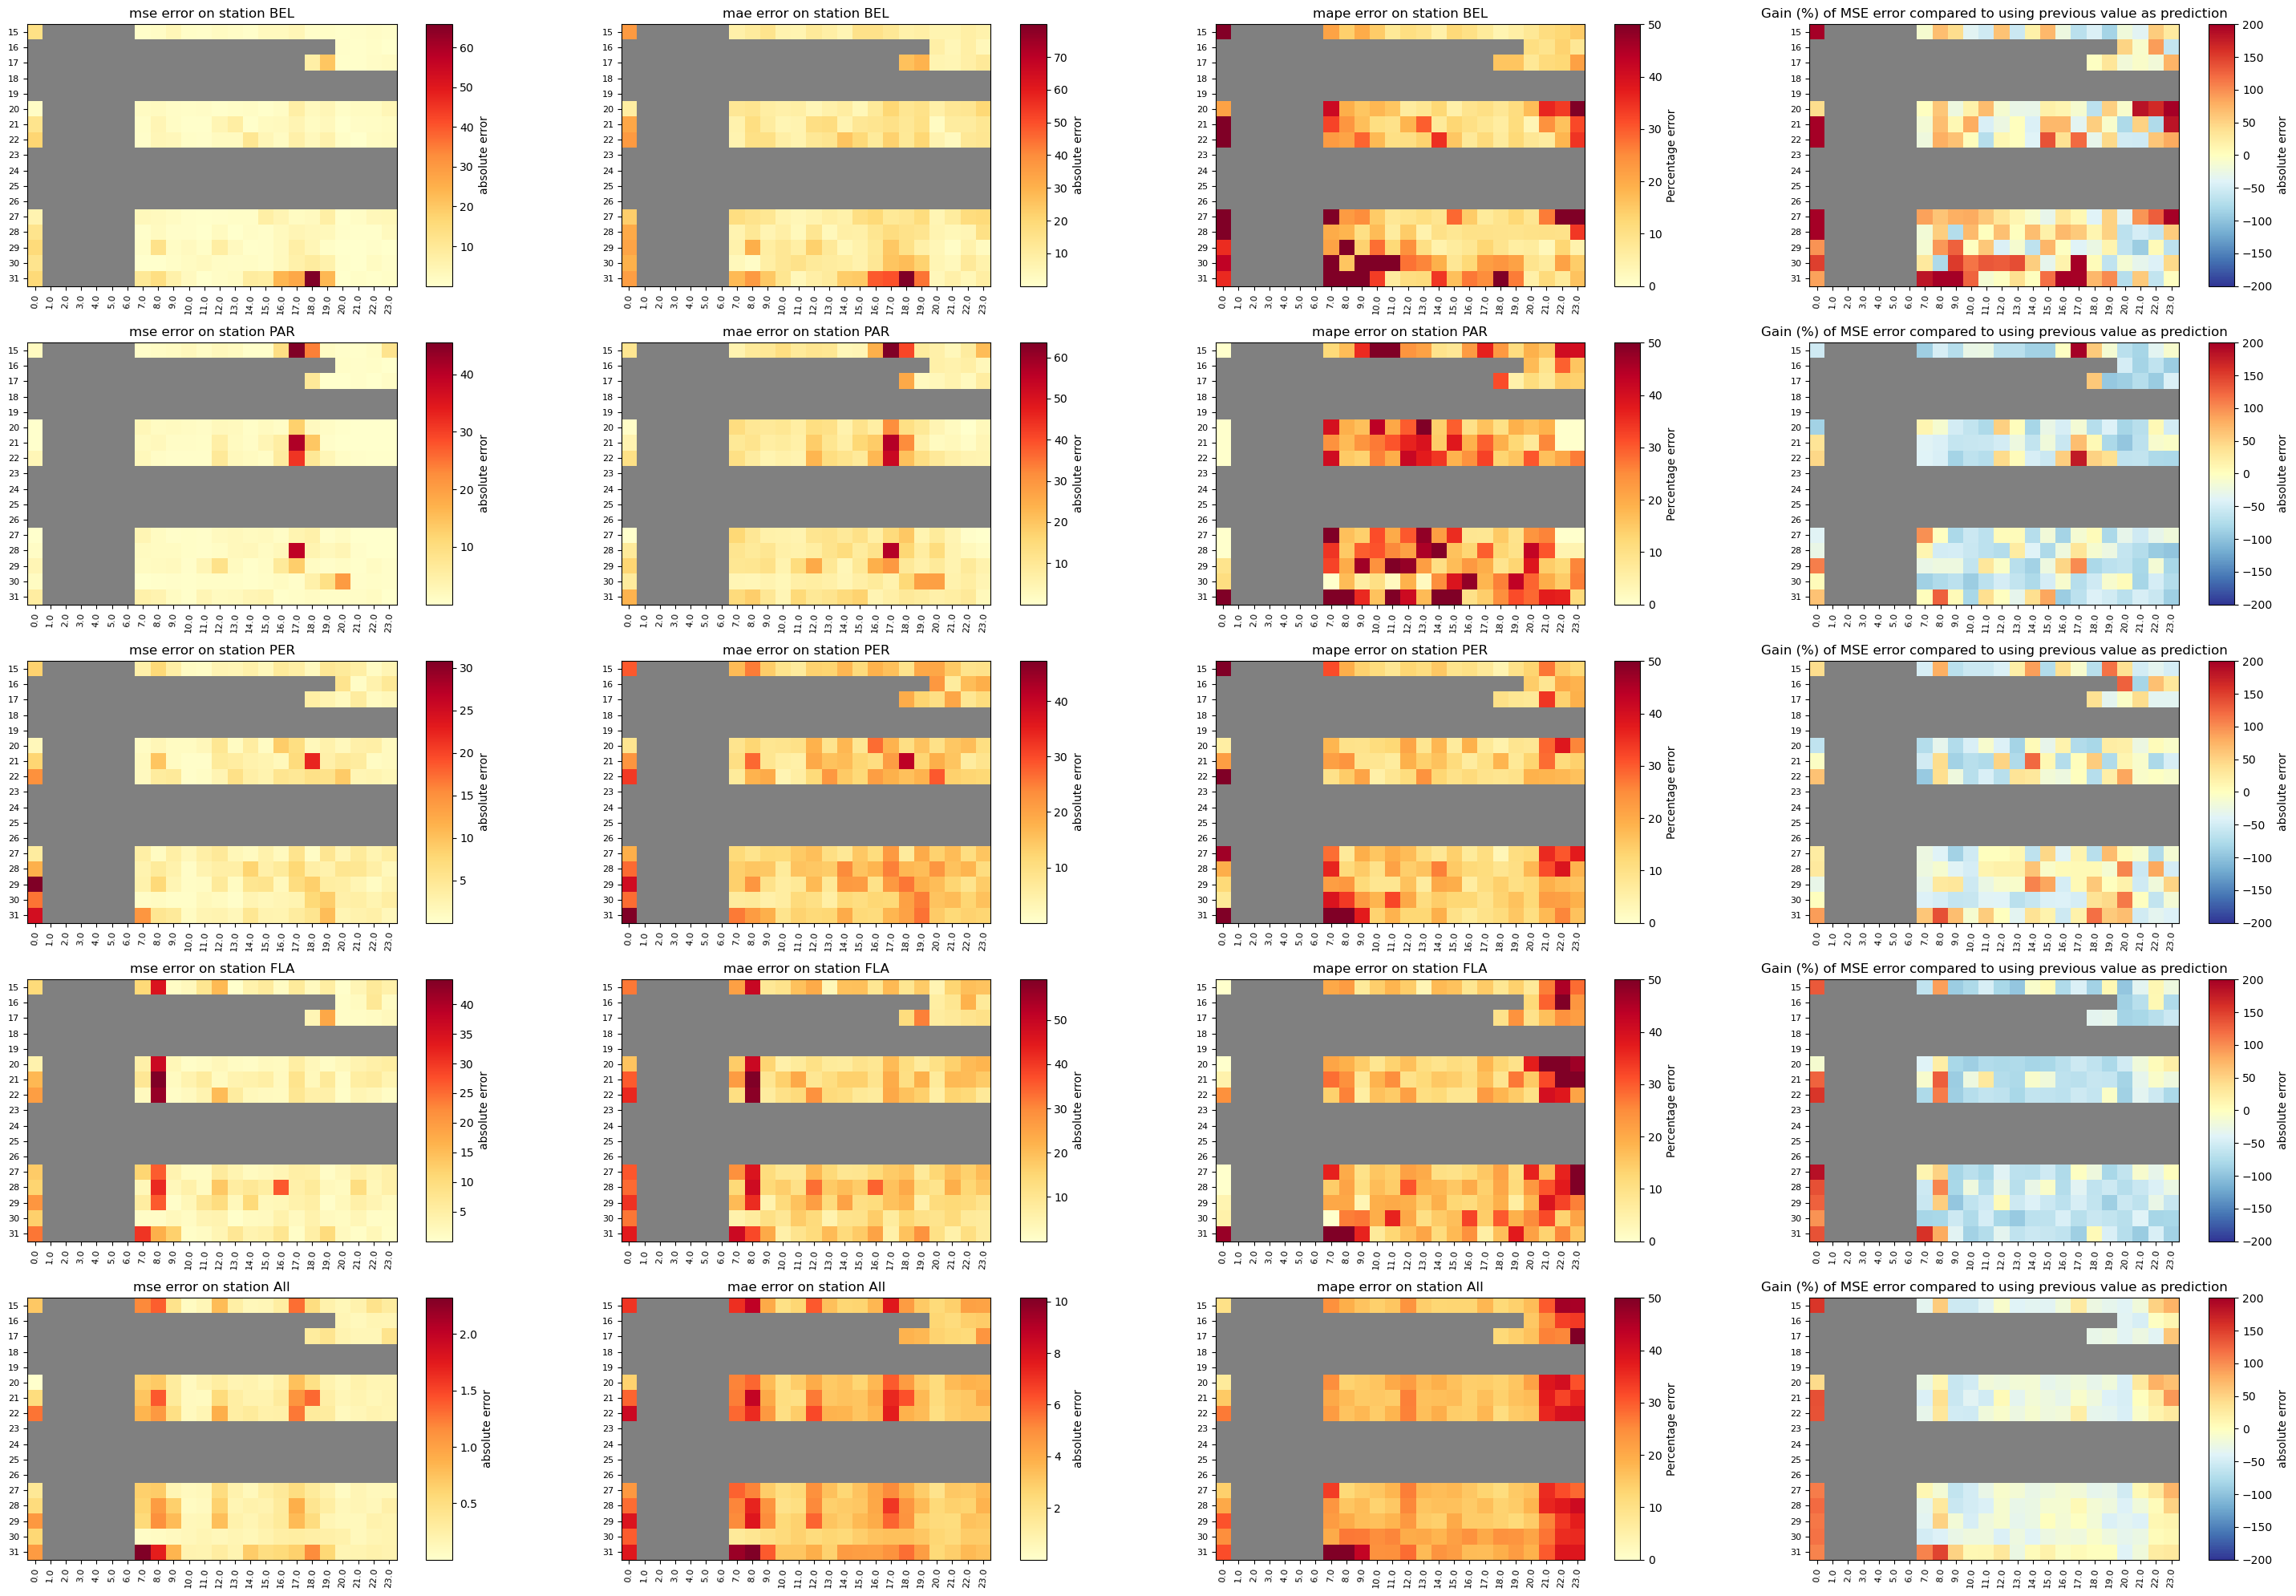

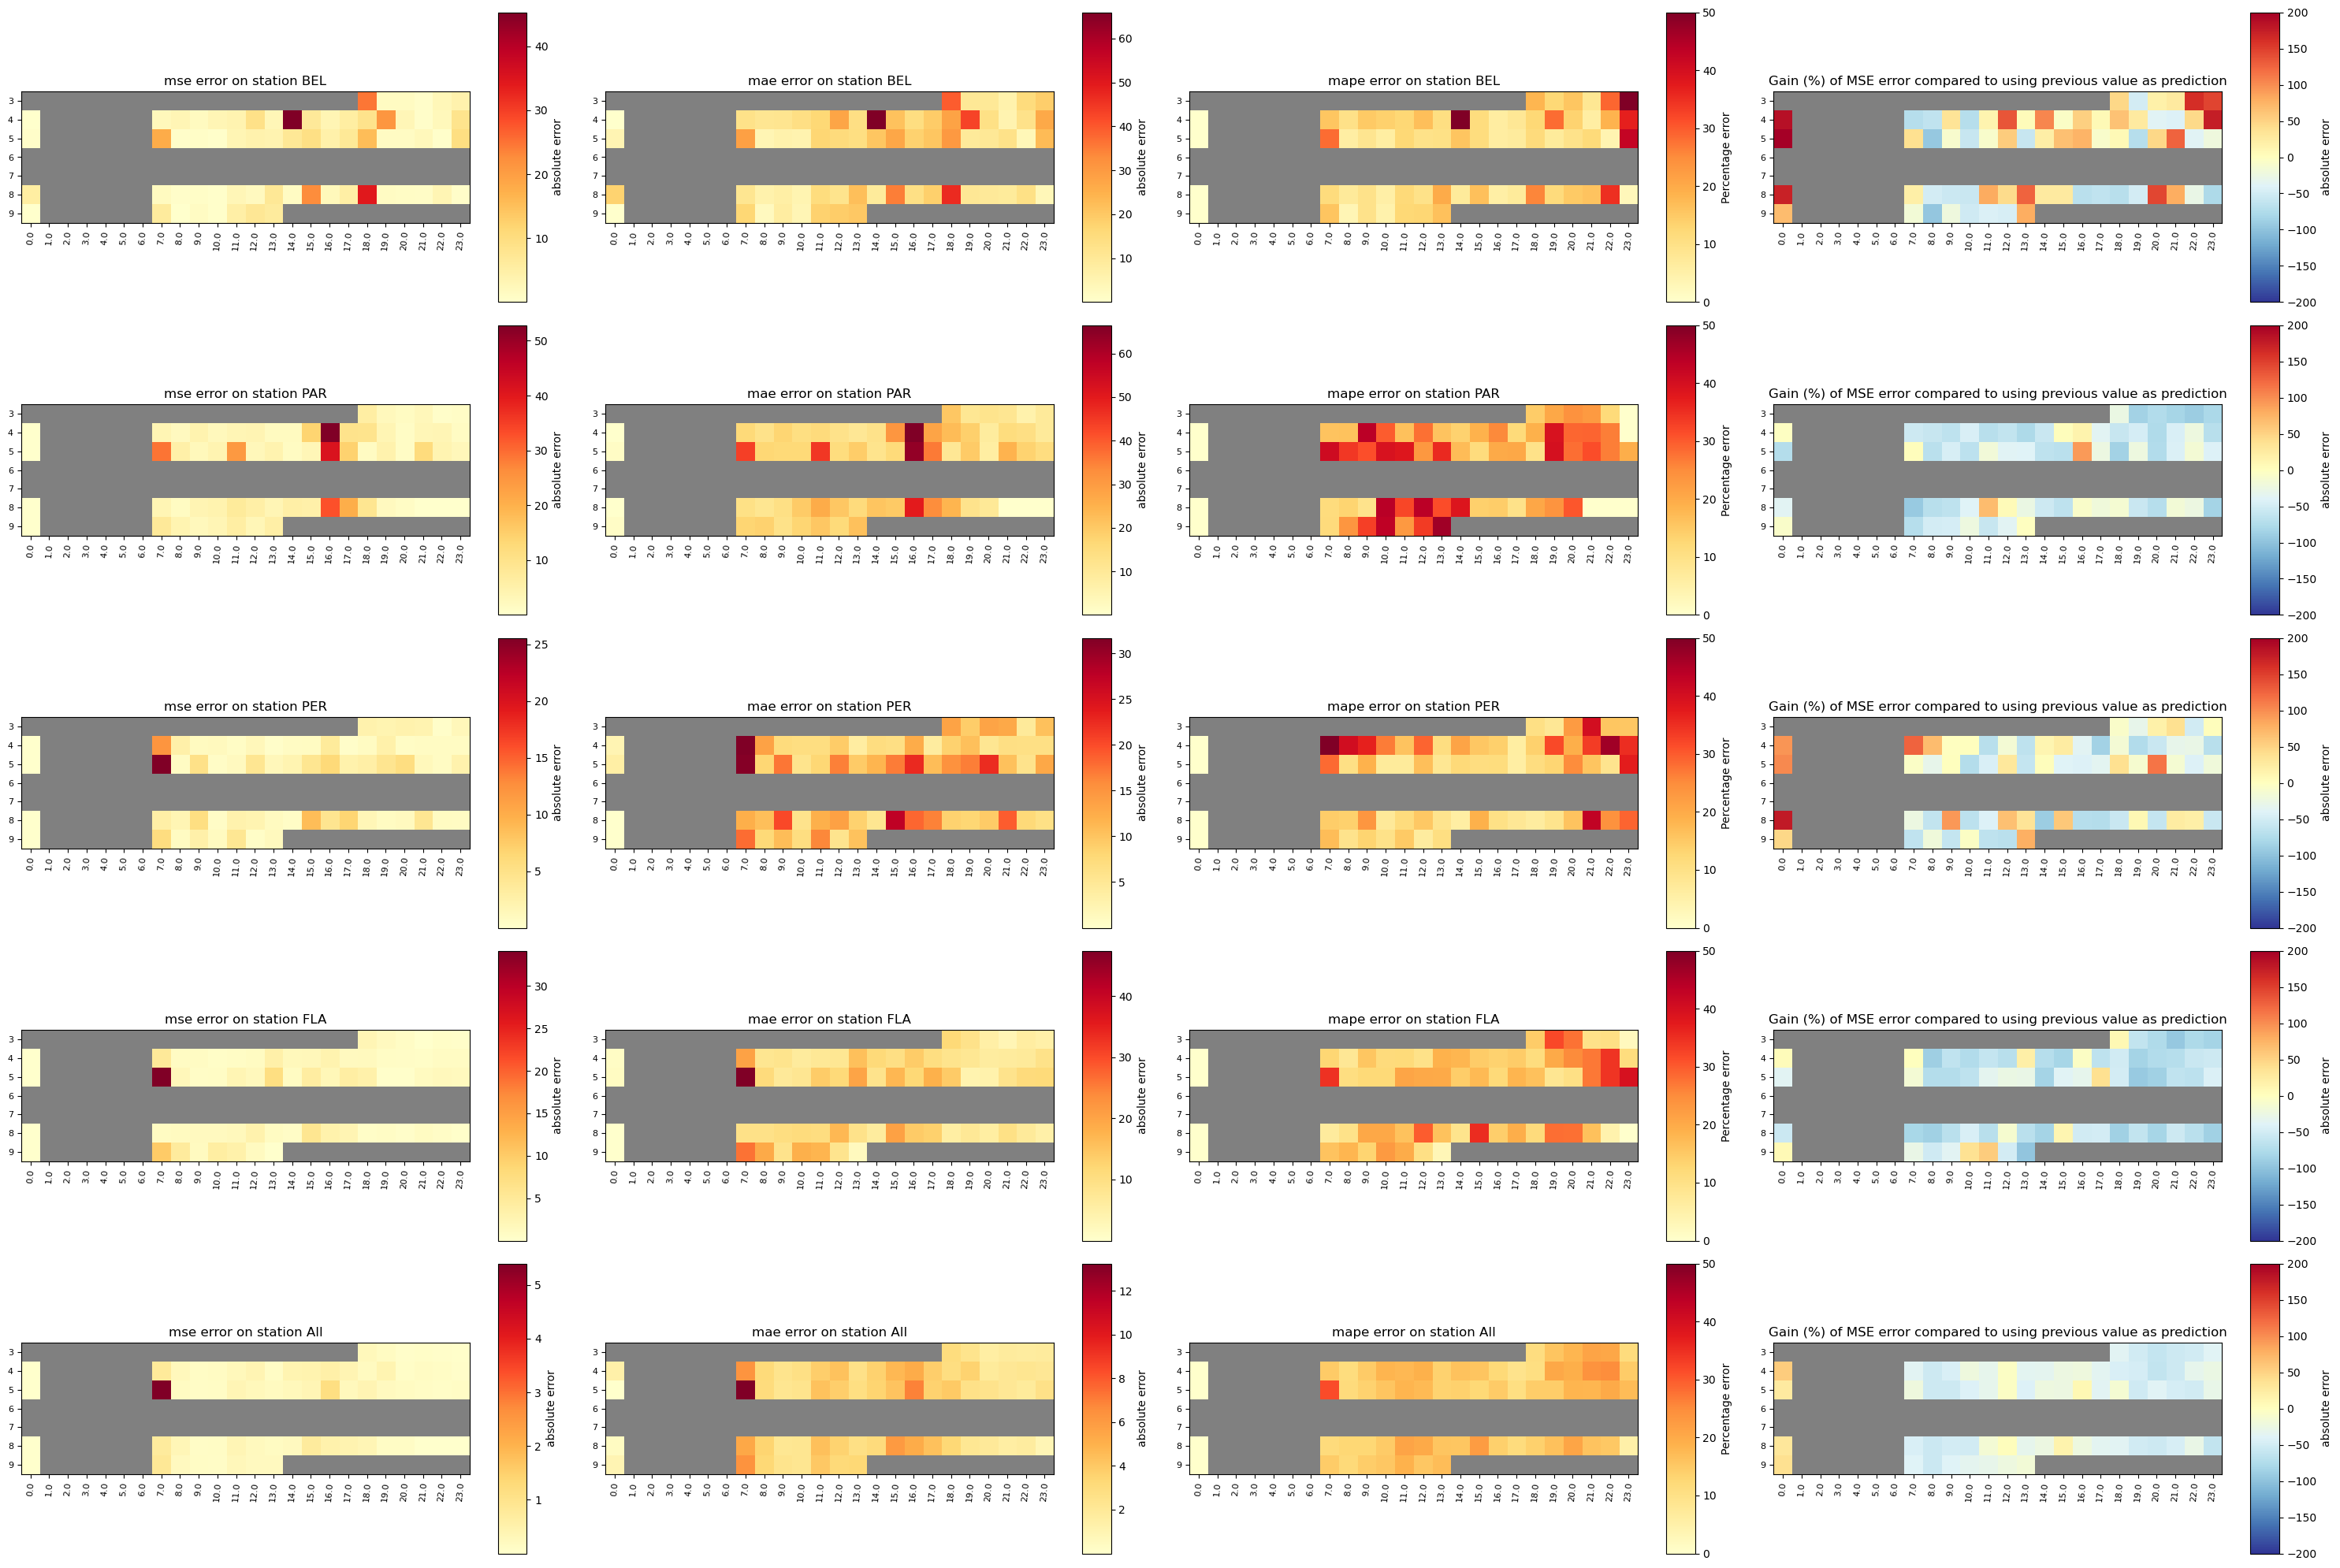

In [2]:
for trial_id in ['subway_in_netmob_POIs_STGCN_VariableSelectionNetwork_MSELoss_2025_01_07_23_12_41192',
                 'subway_in_STGCN_MSELoss_2025_01_06_08_00_94523',
                 "subway_in_subway_out_STGCN_VariableSelectionNetwork_MSELoss_2025_01_06_02_04_17963",
                 #"subway_in_netmob_POIs_STGCN_VariableSelectionNetwork_MSELoss_2025_01_09_07_54_72902" # contient  Instagram, Google Maps, Deezer, WhatsApps, Twiteter, DL, UL
                 ]:

    print('Trial id: ',trial_id)
    args_best_model,_ = load_configuration(trial_id,load_config=True,epochs=None)

    station = ['BEL','PAR','PER','FLA']   # 'BON'  #'GER'
    training_mode_to_visualise = ['test','valid'] # ['test','valid','train']
    modification ={'keep_best_weights':True,
                   'epochs':100
                   }
    #modification = {'epochs':1}

    (trainer,ds,ds_no_shuffle,args) = evaluate_config(args_best_model.model_name,args_best_model.dataset_names,args_best_model.dataset_for_coverage,
                                                    station = station,modification=modification,
                                                    training_mode_to_visualise=training_mode_to_visualise,
                                                    args_init =args_best_model,
                                                    fold_to_evaluate = [0])

    # Init
    for training_mode in training_mode_to_visualise:
        min_flow = 20  # Minimal Flow considered for MAPE, otherwise set error = 0
        limit_percentage_error = 200 # 300% plus mauvais que quand on se sert du previous 
        fig,axes = error_per_station_calendar_pattern(trainer,ds,training_mode,metrics = ['mse','mae','mape','previous_value'],
                                                    freq='1h',
                                                    min_flow=min_flow,
                                                    figsize = (30,5*len(station)),
                                                    limit_percentage_error = limit_percentage_error,
                                                    stations = station)
    break


In [56]:
from plotting.plotting import get_y_size_from_temporal_agg,temporal_aggregation_of_attn_weight
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd 

def plot_attn_weight(trainer,nb_calendar_data,ds,training_mode = None,temporal_agg = None,save=None,stations= None):

    # Load Inputs : 
    X,Y,X_c,nb_contextual = trainer.load_all_inputs_from_training_mode(training_mode)
    

    X = X.to(trainer.args.device)
    Y = Y.to(trainer.args.device)
    X_c = [x_c.to(trainer.args.device)for x_c in X_c]
    # Init:
    num_heads = trainer.args.args_vision.num_heads
    spatial_units = list(ds.spatial_unit)
    if stations is not None :
        nb_stations_to_plot = len(stations)*num_heads 
    else :
        stations = list(ds.spatial_unit)
        nb_stations_to_plot = Y.size(1)*num_heads 
    num_cols = 4
    

    nb_rows = (nb_stations_to_plot + num_cols - 1) // num_cols  
    y_size = get_y_size_from_temporal_agg(temporal_agg)
    #plt.figure(figsize=(5*num_cols,y_size))  
    plt.figure(figsize=(5*num_cols*max(1,nb_stations_to_plot//15),int(y_size*max(1,nb_stations_to_plot//num_cols))))


    for station_i in range(nb_stations_to_plot//num_heads):

        station_ind  = spatial_units.index(stations[station_i])

        enhanced_x,attn_weights = trainer.model.netmob_vision.model[station_ind](X[:,station_ind,:],X_c[station_ind+nb_calendar_data],x_known = None)
        nb_contextuals = attn_weights.size(-1)

        mh_attn_weights_reshaped = attn_weights.squeeze().detach().cpu().numpy()  # Shape [B,num_heads,P]
        for head_i in range(num_heads):
            if num_heads == 1:
                attn_weights_reshaped = mh_attn_weights_reshaped
            else:
                attn_weights_reshaped = mh_attn_weights_reshaped[:,head_i,:]
            

            # Temporal Aggregation of attn weight:
            attn_weights_reshaped,str_dates = temporal_aggregation_of_attn_weight(attn_weights_reshaped,ds,training_mode,temporal_agg)
            ax = plt.subplot(nb_rows, num_cols, (station_i*num_heads)+head_i + 1)  # Créer un subplot

            vmin,vmax = 0,min(1,1/(nb_contextuals/3)) 
            im = ax.imshow(attn_weights_reshaped, cmap='hot', aspect='auto',vmin=vmin,vmax=vmax)
            plt.colorbar(im,label='Attention Weight',shrink = 0.25)
            
            if temporal_agg is None:
                plt.title(f'Attention Weight\nof station {station_ind} ({spatial_units[station_ind]}) head {head_i} \nfor each sample of the batch')
                plt.ylabel('Samples')
            else:
                plt.title(f'Mean Attention Weight\nof station {station_i}({spatial_units[station_ind]}) head {head_i} \nby calendar class') 
                plt.ylabel('Calendar class')
            plt.xlabel('Contextual time-series')


            num_samples, nb_contextual_on_plot_i = attn_weights_reshaped.shape
            plt.xticks(ticks=np.arange(nb_contextual_on_plot_i), labels=[f'Unit {i}' for i in range(nb_contextual_on_plot_i)], rotation=45)
            plt.yticks(ticks=np.arange(num_samples), labels=str_dates)

        plt.tight_layout()

    if save is not None:
        plt.savefig(f'{save}.pdf',format = 'pdf',bbox_inches='tight')
    plt.show()

def temporal_aggregation_of_attn_weight(attn_weights_reshaped,ds,training_mode,temporal_agg):
    ''' 
    Return the temporal aggregation of attn weights to visualise them 

    args:
    ------
    temporal_agg : choices ['hour','weekday','weekday_hour','weekday_hour_minutes']
    '''

    if temporal_agg is not None:
        index_df = getattr(ds.tensor_limits_keeper,f"df_verif_{training_mode}").iloc[:,-1]
        df = pd.DataFrame(attn_weights_reshaped,index = index_df) #,columns = ds.spatial_unit)
        weekdays = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']


        if temporal_agg == 'hour':
            df_agg = df.groupby([df.index.hour]).agg('mean')
            str_dates = list(df_agg.index.map(lambda x: f"{x:02d}"))

        elif temporal_agg == 'weekday':
            df_agg = df.groupby([df.index.weekday]).agg('mean')
            str_dates = list(df_agg.index.map(lambda x: weekdays[x]))

        elif temporal_agg == 'weekday_hour':
            df_agg = df.groupby([df.index.weekday,df.index.hour]).agg('mean')
            str_dates = list(df_agg.index.map(lambda x: f"{weekdays[x[0]]} {x[1]:02d}"))

        elif temporal_agg == 'weekday_hour_minute':
            df_agg = df.groupby([df.index.weekday,df.index.hour,df.index.minute]).agg('mean')
            str_dates = list(df_agg.index.map(lambda x: f"{weekdays[x[0]]} {x[1]:02d}:{x[2]:02d}"))
        else:
            raise NotImplementedError(f'Temporal aggregation {temporal_agg} has not been implemented')
        attn_weights_reshaped = df_agg.values  
    else:
        str_dates = list(df.index.strftime('%Y-%m-%d %H:%M'))

    return attn_weights_reshaped,str_dates


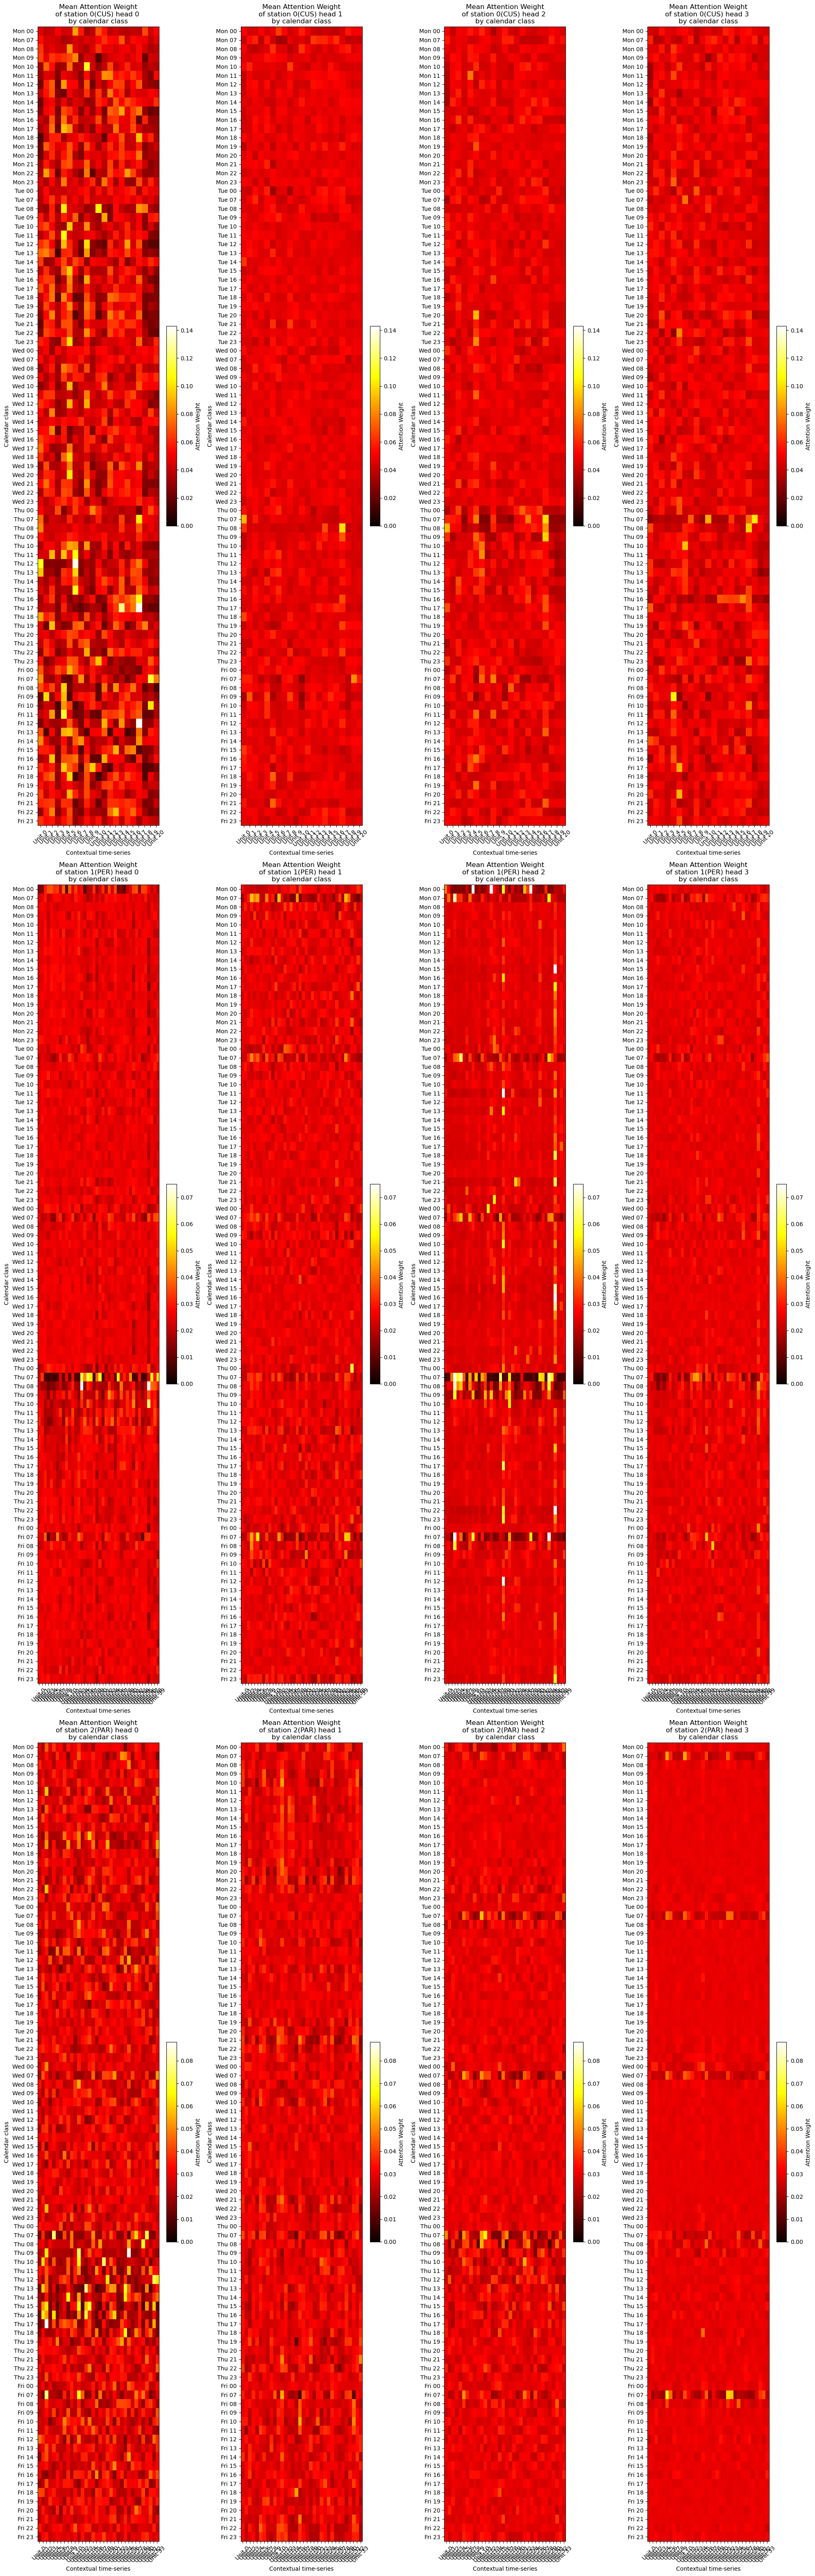

In [57]:
from constants.paths import CALENDAR_TYPE
nb_calendar_data = len(CALENDAR_TYPE)

training_mode = 'test'
temporal_agg = 'weekday_hour' # 'hour' # 'weekday' # 'weekday_hour'
save = 'attn_weight'

plot_attn_weight(trainer,nb_calendar_data,ds= ds,training_mode = training_mode,temporal_agg = temporal_agg,save=save,stations= ['CUS','PER','PAR'])

device(type='cuda')

In [19]:
trainer.model.netmob_vision.model[0].attention.W_v

Parameter containing:
tensor([[ 0.1957, -0.0335, -0.3487,  0.0792,  0.3181, -0.1998, -0.0124, -0.2401,
          0.2955,  0.3514,  0.2995,  0.0621, -0.1637, -0.3609, -0.3460, -0.1348,
         -0.3441, -0.2448,  0.3868, -0.0040,  0.2488, -0.1684,  0.1353, -0.3110,
          0.3285, -0.1414, -0.0909,  0.1424, -0.0496, -0.3482, -0.1008, -0.1695],
        [ 0.0045, -0.0473, -0.1395,  0.0496,  0.3453,  0.1424,  0.3155,  0.2888,
         -0.1866,  0.3714, -0.0834, -0.2137,  0.1194, -0.3443,  0.1161, -0.2009,
          0.0457, -0.1998, -0.0607,  0.3148,  0.2962, -0.1760, -0.1042,  0.1944,
         -0.0203,  0.3281, -0.2510,  0.2949, -0.0243,  0.1919,  0.3158,  0.2562],
        [-0.2085, -0.3316,  0.2355, -0.2019, -0.2044, -0.0558,  0.2295, -0.2266,
          0.0118,  0.0201,  0.2684, -0.1512,  0.2485,  0.1797, -0.1329, -0.2873,
         -0.3402,  0.1840, -0.1563, -0.0914, -0.0391, -0.2609, -0.3266,  0.2437,
          0.3213, -0.2992,  0.1097,  0.1994,  0.2031, -0.1969, -0.1009, -0.0972],
   

In [ ]:
from plotting.plotting import plot_attn_weight
from constants.paths import CALENDAR_TYPE
nb_calendar_data = len(CALENDAR_TYPE)

training_mode = 'test'
temporal_agg = 'weekday_hour' # 'hour' # 'weekday' # 'weekday_hour'
save = 'attn_weight'
plot_attn_weight(trainer,nb_calendar_data,ds,training_mode,temporal_agg,save)

### Evaluate config :

Trial id:  subway_in_STGCN_MSELoss_2025_01_06_08_00_94523

>>>> Load best CONFIG

Init Dataset:  torch.Size([7392, 40])
Number of Nan Value:  tensor(0)
Total Number of Elements:  295680 

U/Utarget size: torch.Size([3420, 40, 7])/torch.Size([3420, 40, 1]) Train/Valid/Test 2052 684 683

 ===== ERROR ==== 
Try with torch >= 2.0.0 (works with 2.0.1) to allow 'prefetch_factor' 
ValueError: prefetch_factor option could only be specified in multiprocessing.let num_workers > 0 to enable multiprocessing

 ===== ERROR ==== 
Try with torch >= 2.0.0 (works with 2.0.1) to allow 'prefetch_factor' 
ValueError: prefetch_factor option could only be specified in multiprocessing.let num_workers > 0 to enable multiprocessing

 ===== ERROR ==== 
Try with torch >= 2.0.0 (works with 2.0.1) to allow 'prefetch_factor' 
ValueError: prefetch_factor option could only be specified in multiprocessing.let num_workers > 0 to enable multiprocessing
----------------------------------------
Fold n°0

Init Dataset:  tor

Model size: 0.000GB
number of total parameters: 71713
number of trainable parameters: 71713

start training
epoch: 0 
 min\epoch : 0.04
Estimated time for training: 1.1min 

Training Throughput:1696.12 sequences per seconds
>>> Training complete in: 0:00:56.831953
>>> Training performance time: min 0.013546466827392578 avg 0.018535852432250977 seconds (+/- 0.002343249525483025)
>>> Loading performance time: min 0.00041174888610839844 avg 0.010448466340925793 seconds (+/- 0.014796339801086866)
>>> Forward performance time: 0.0039372516623273545 seconds (+/- 0.0005226351677404796)
>>> Backward performance time: 0.007691029907878246 seconds (+/- 0.0018790737589199128)
>>> Plotting performance time: 2.906780050258444e-06 seconds (+/- 7.506767151363666e-06)
>>> Saving performance time: 0.1403047800064087 seconds (+/- 0.028620771344660585)
>>> PI-tracking performance time: 4.026624891493056e-06 seconds (+/- 8.256550997241648e-06)
>>> Scheduler-update performance time: 1.7026458123717644e-06 

Loading BokehJS ...

Loading BokehJS ...

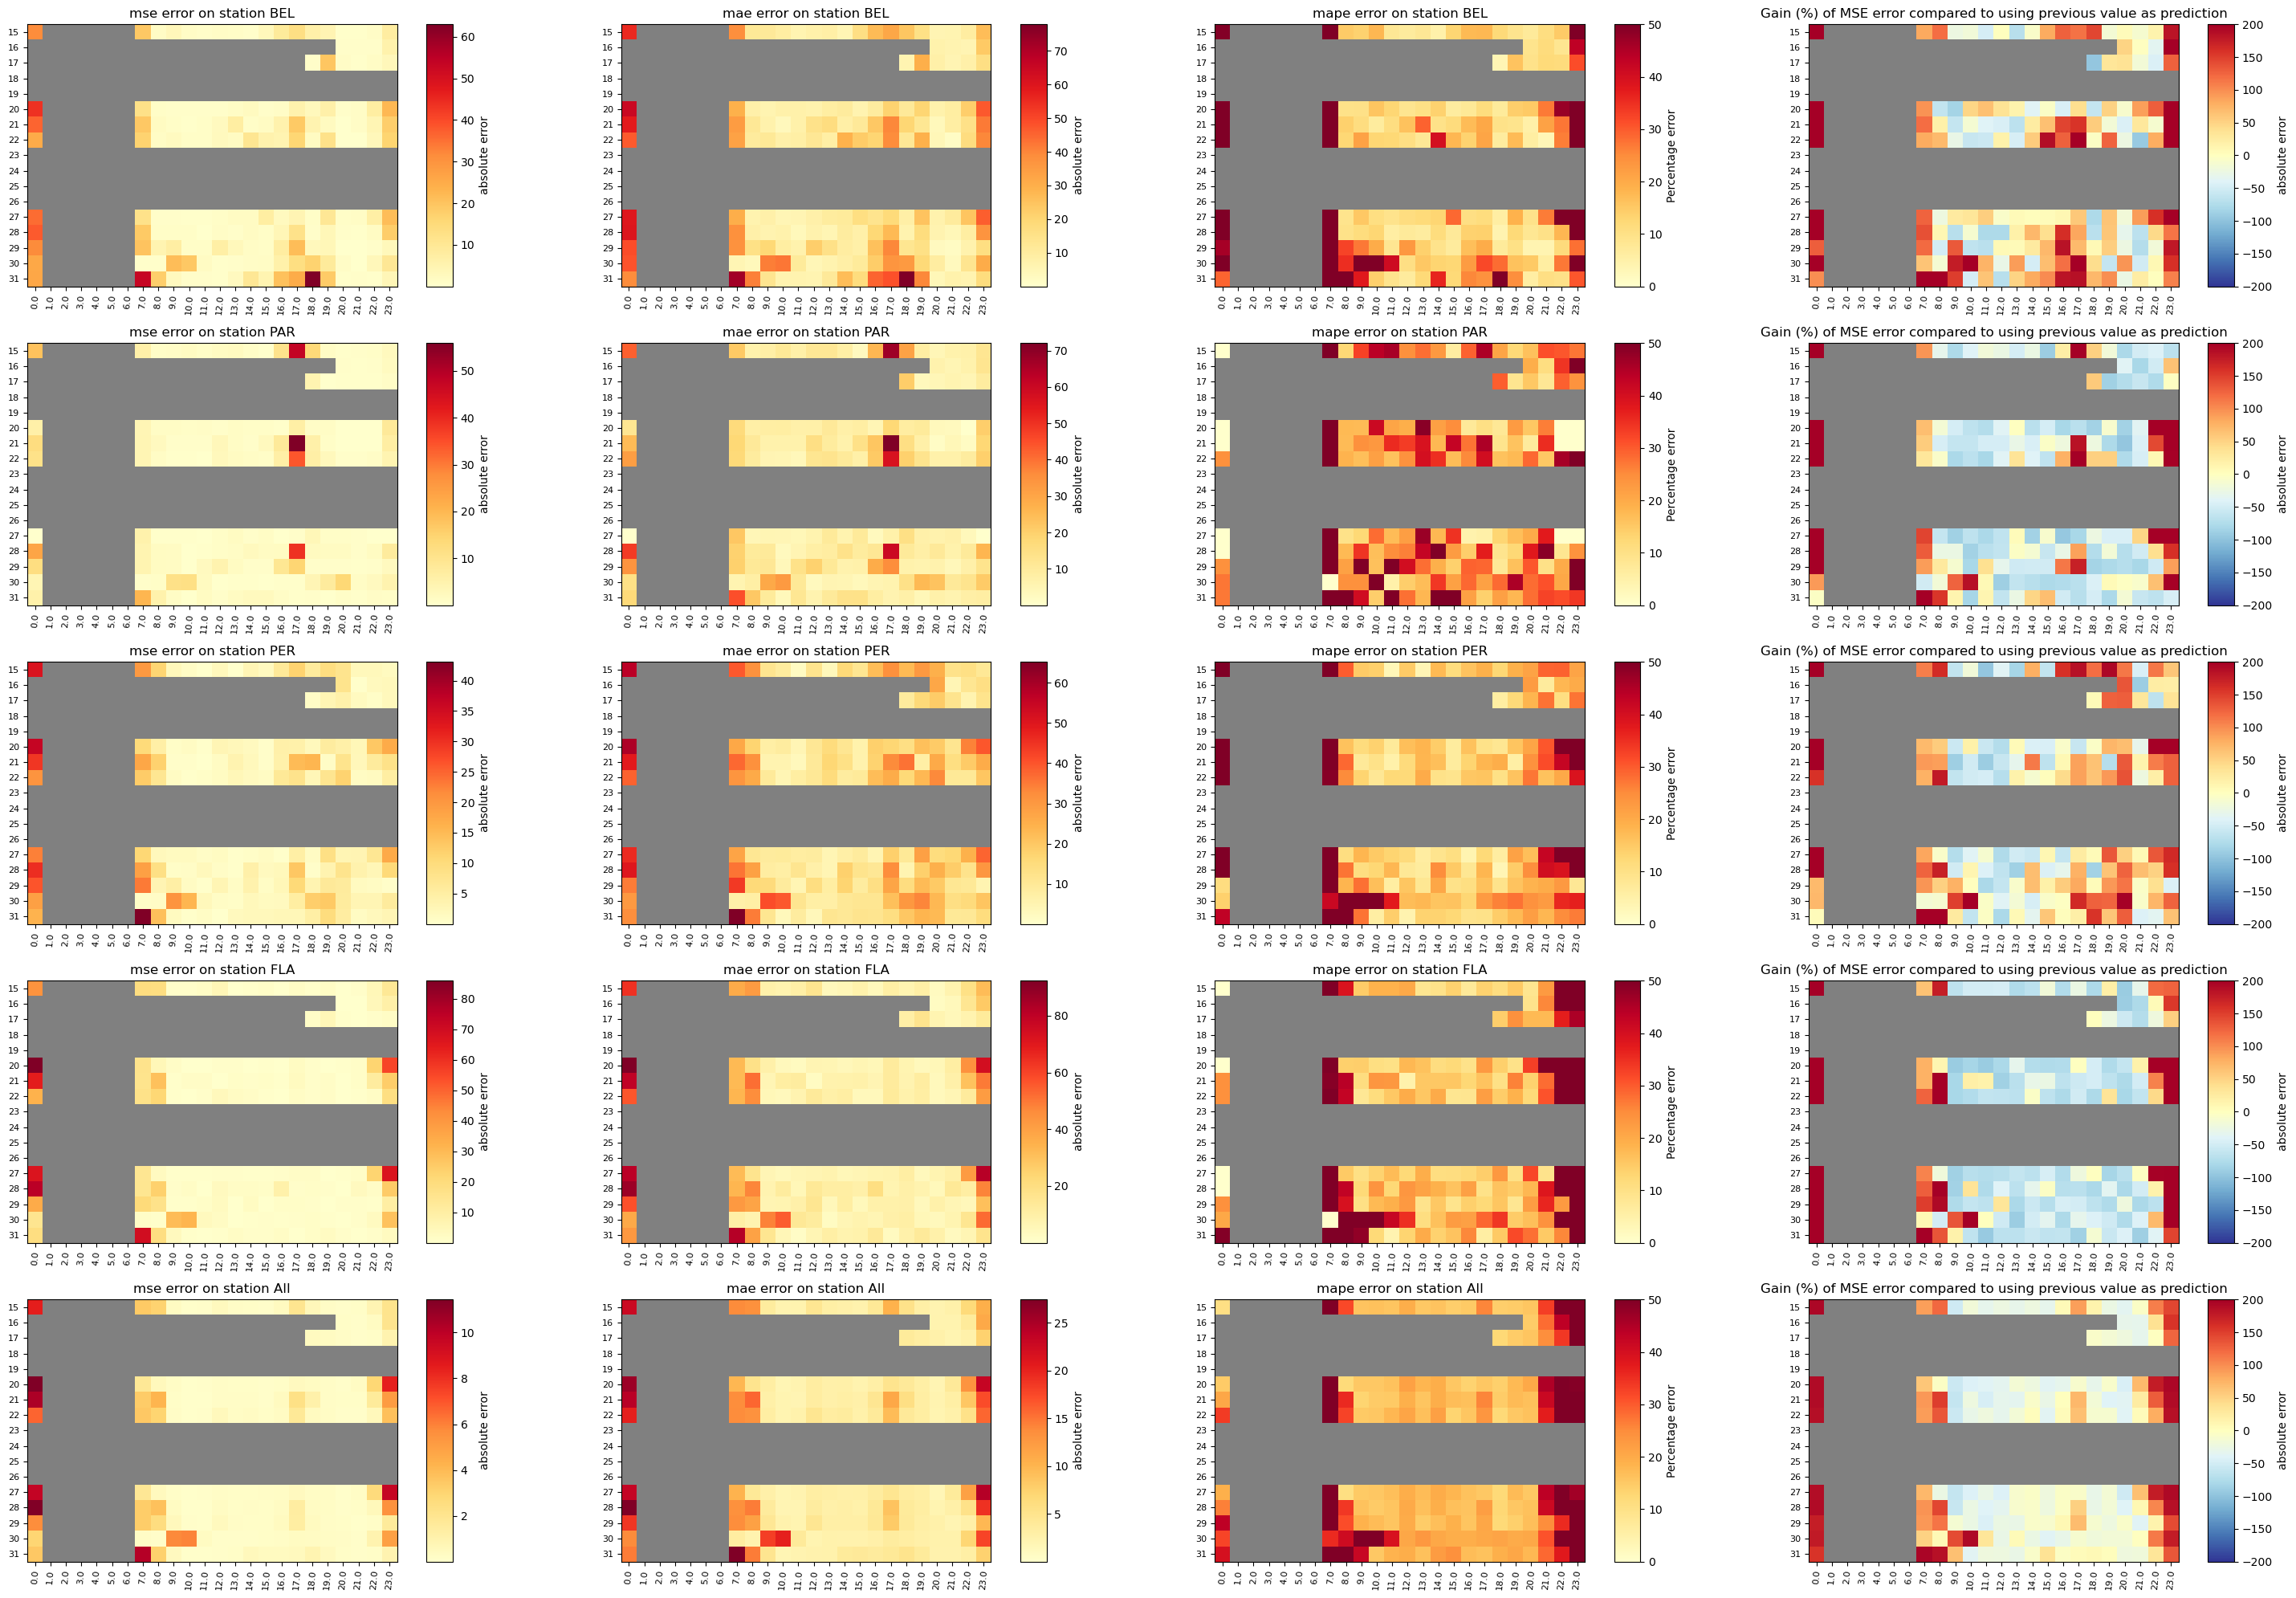

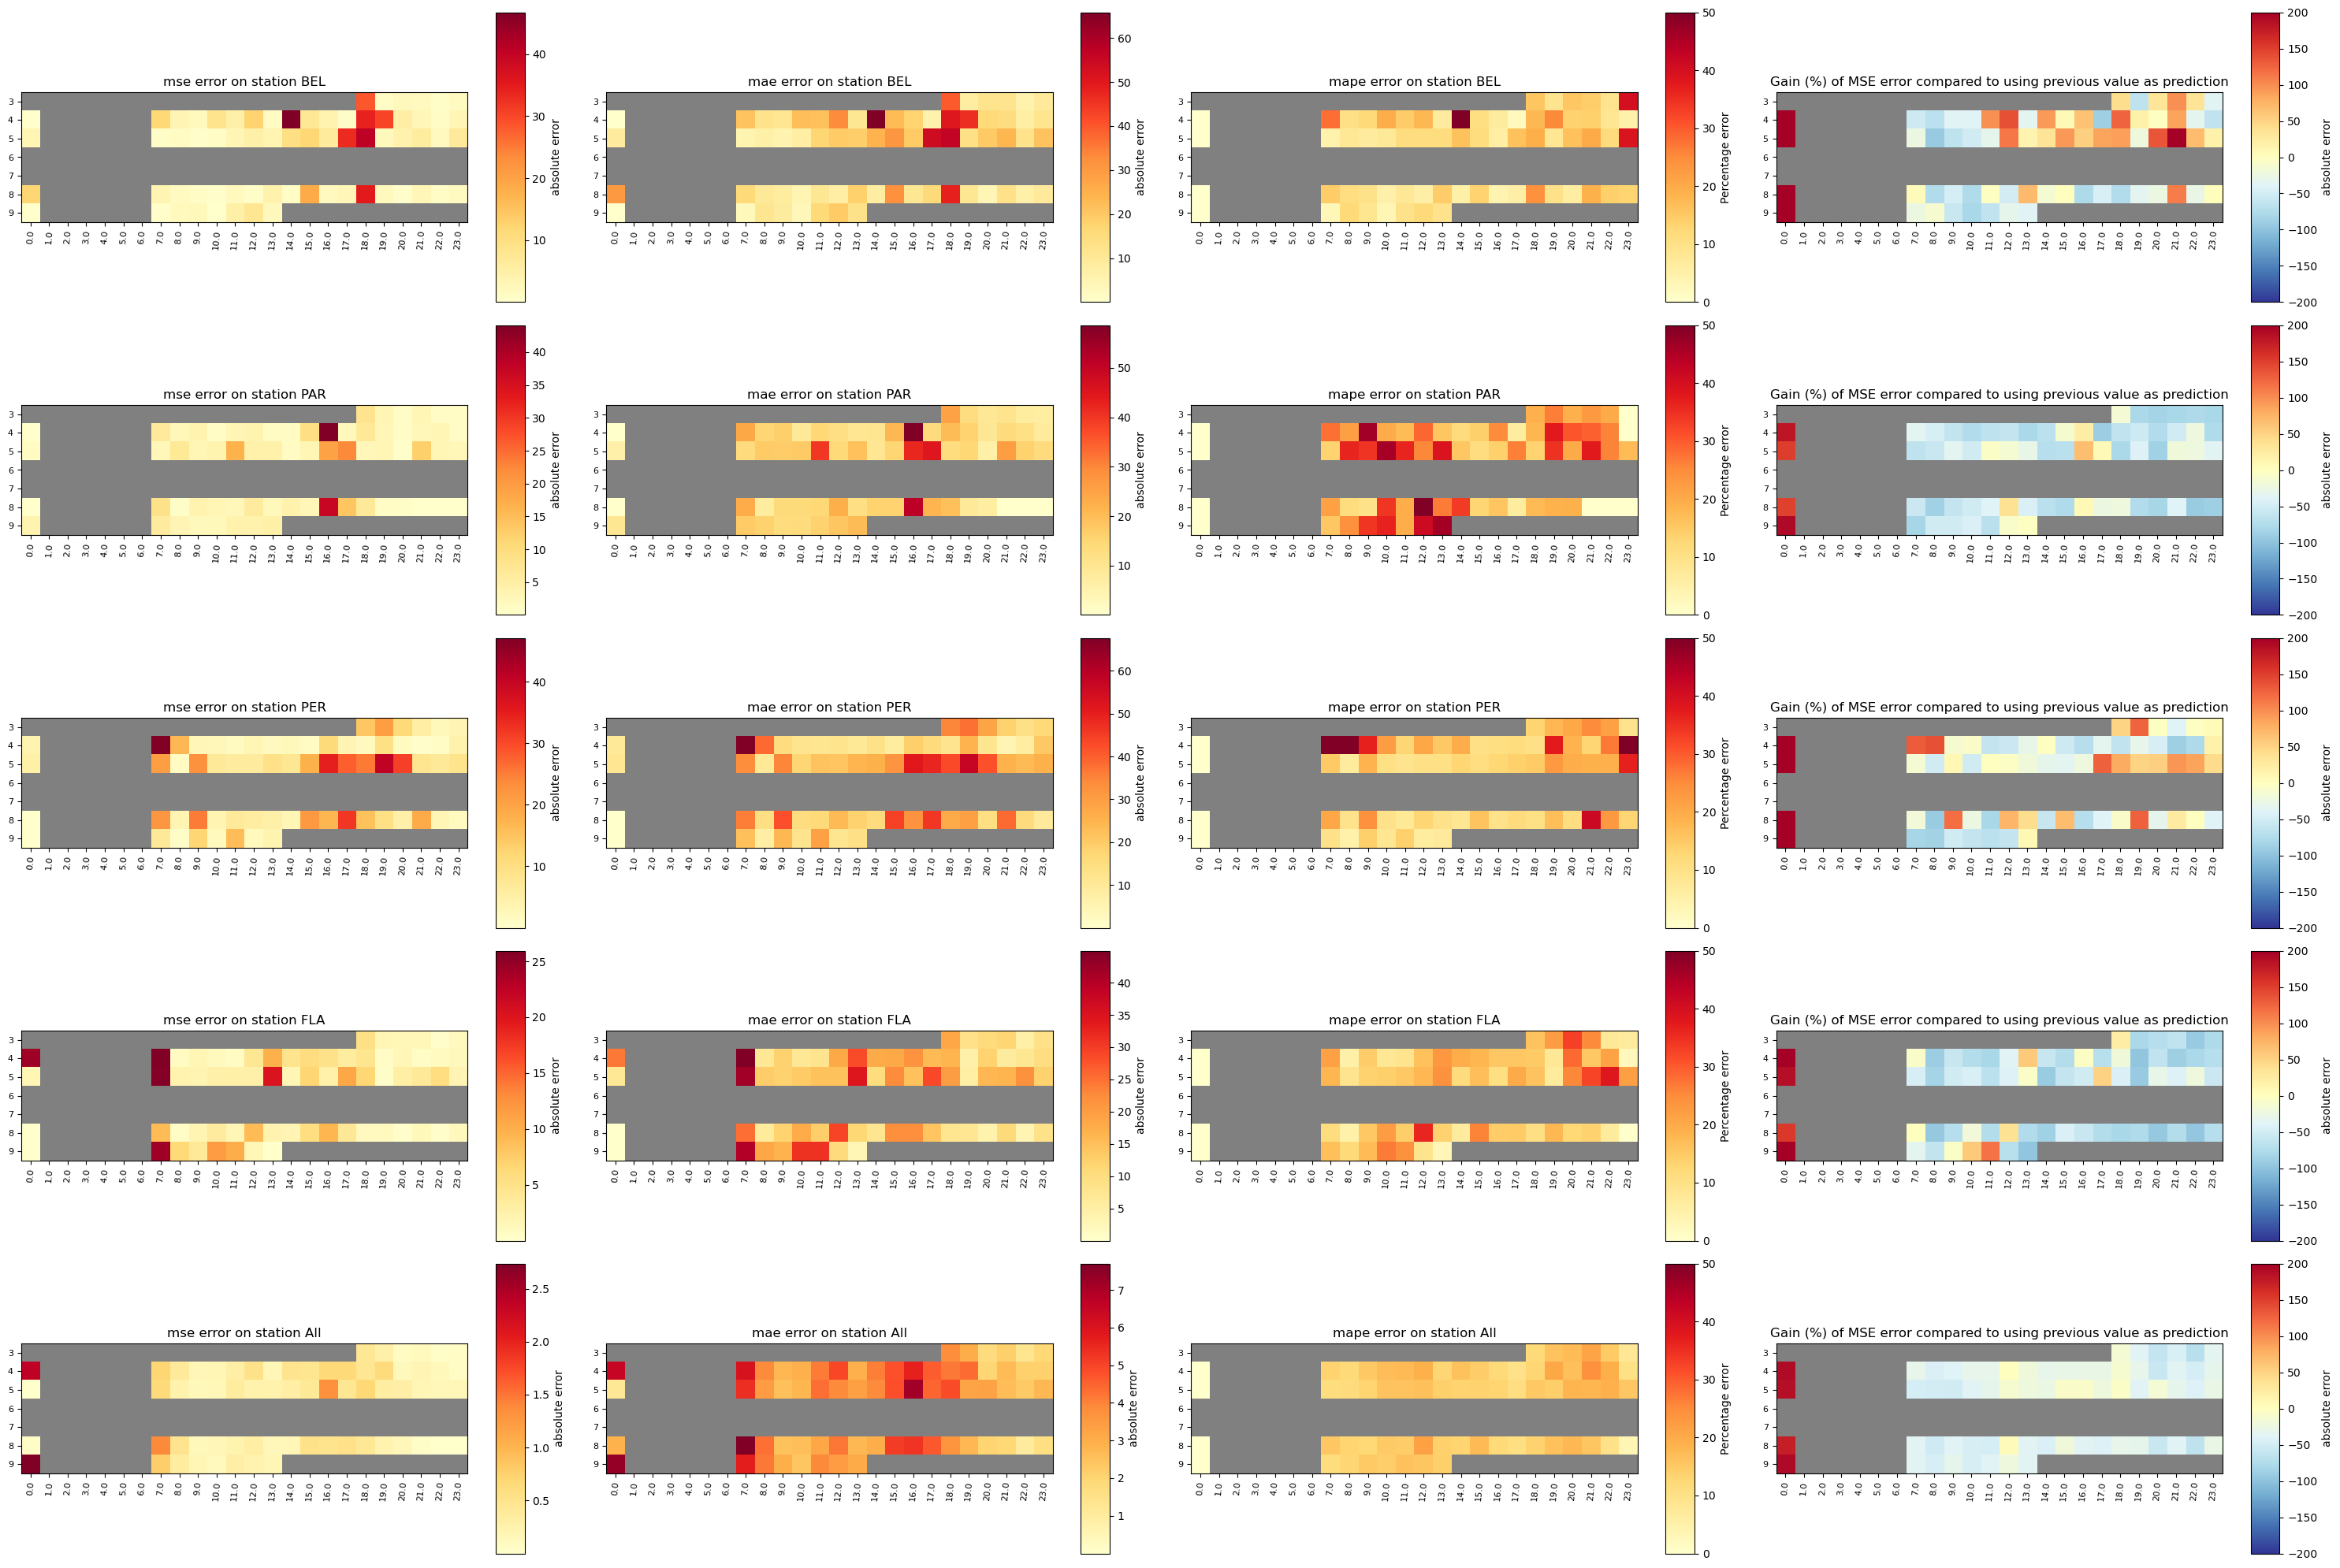

Trial id:  subway_in_subway_out_STGCN_VariableSelectionNetwork_MSELoss_2025_01_06_02_04_17963

>>>> Load best CONFIG

Init Dataset:  torch.Size([7392, 40])
Number of Nan Value:  tensor(0)
Total Number of Elements:  295680 

U/Utarget size: torch.Size([3420, 40, 7])/torch.Size([3420, 40, 1]) Train/Valid/Test 2052 684 683
Spatial unit:  AMP
U/Utarget size: torch.Size([3420, 40, 7])/torch.Size([3420, 40, 1]) Train/Valid/Test 2052 684 683
Spatial unit:  BEL
U/Utarget size: torch.Size([3420, 40, 7])/torch.Size([3420, 40, 1]) Train/Valid/Test 2052 684 683
Spatial unit:  BRO
U/Utarget size: torch.Size([3420, 40, 7])/torch.Size([3420, 40, 1]) Train/Valid/Test 2052 684 683
Spatial unit:  COR
U/Utarget size: torch.Size([3420, 40, 7])/torch.Size([3420, 40, 1]) Train/Valid/Test 2052 684 683
Spatial unit:  CUI
U/Utarget size: torch.Size([3420, 40, 7])/torch.Size([3420, 40, 1]) Train/Valid/Test 2052 684 683
Spatial unit:  CUS
U/Utarget size: torch.Size([3420, 40, 7])/torch.Size([3420, 40, 1]) Train/

Loading BokehJS ...

Loading BokehJS ...

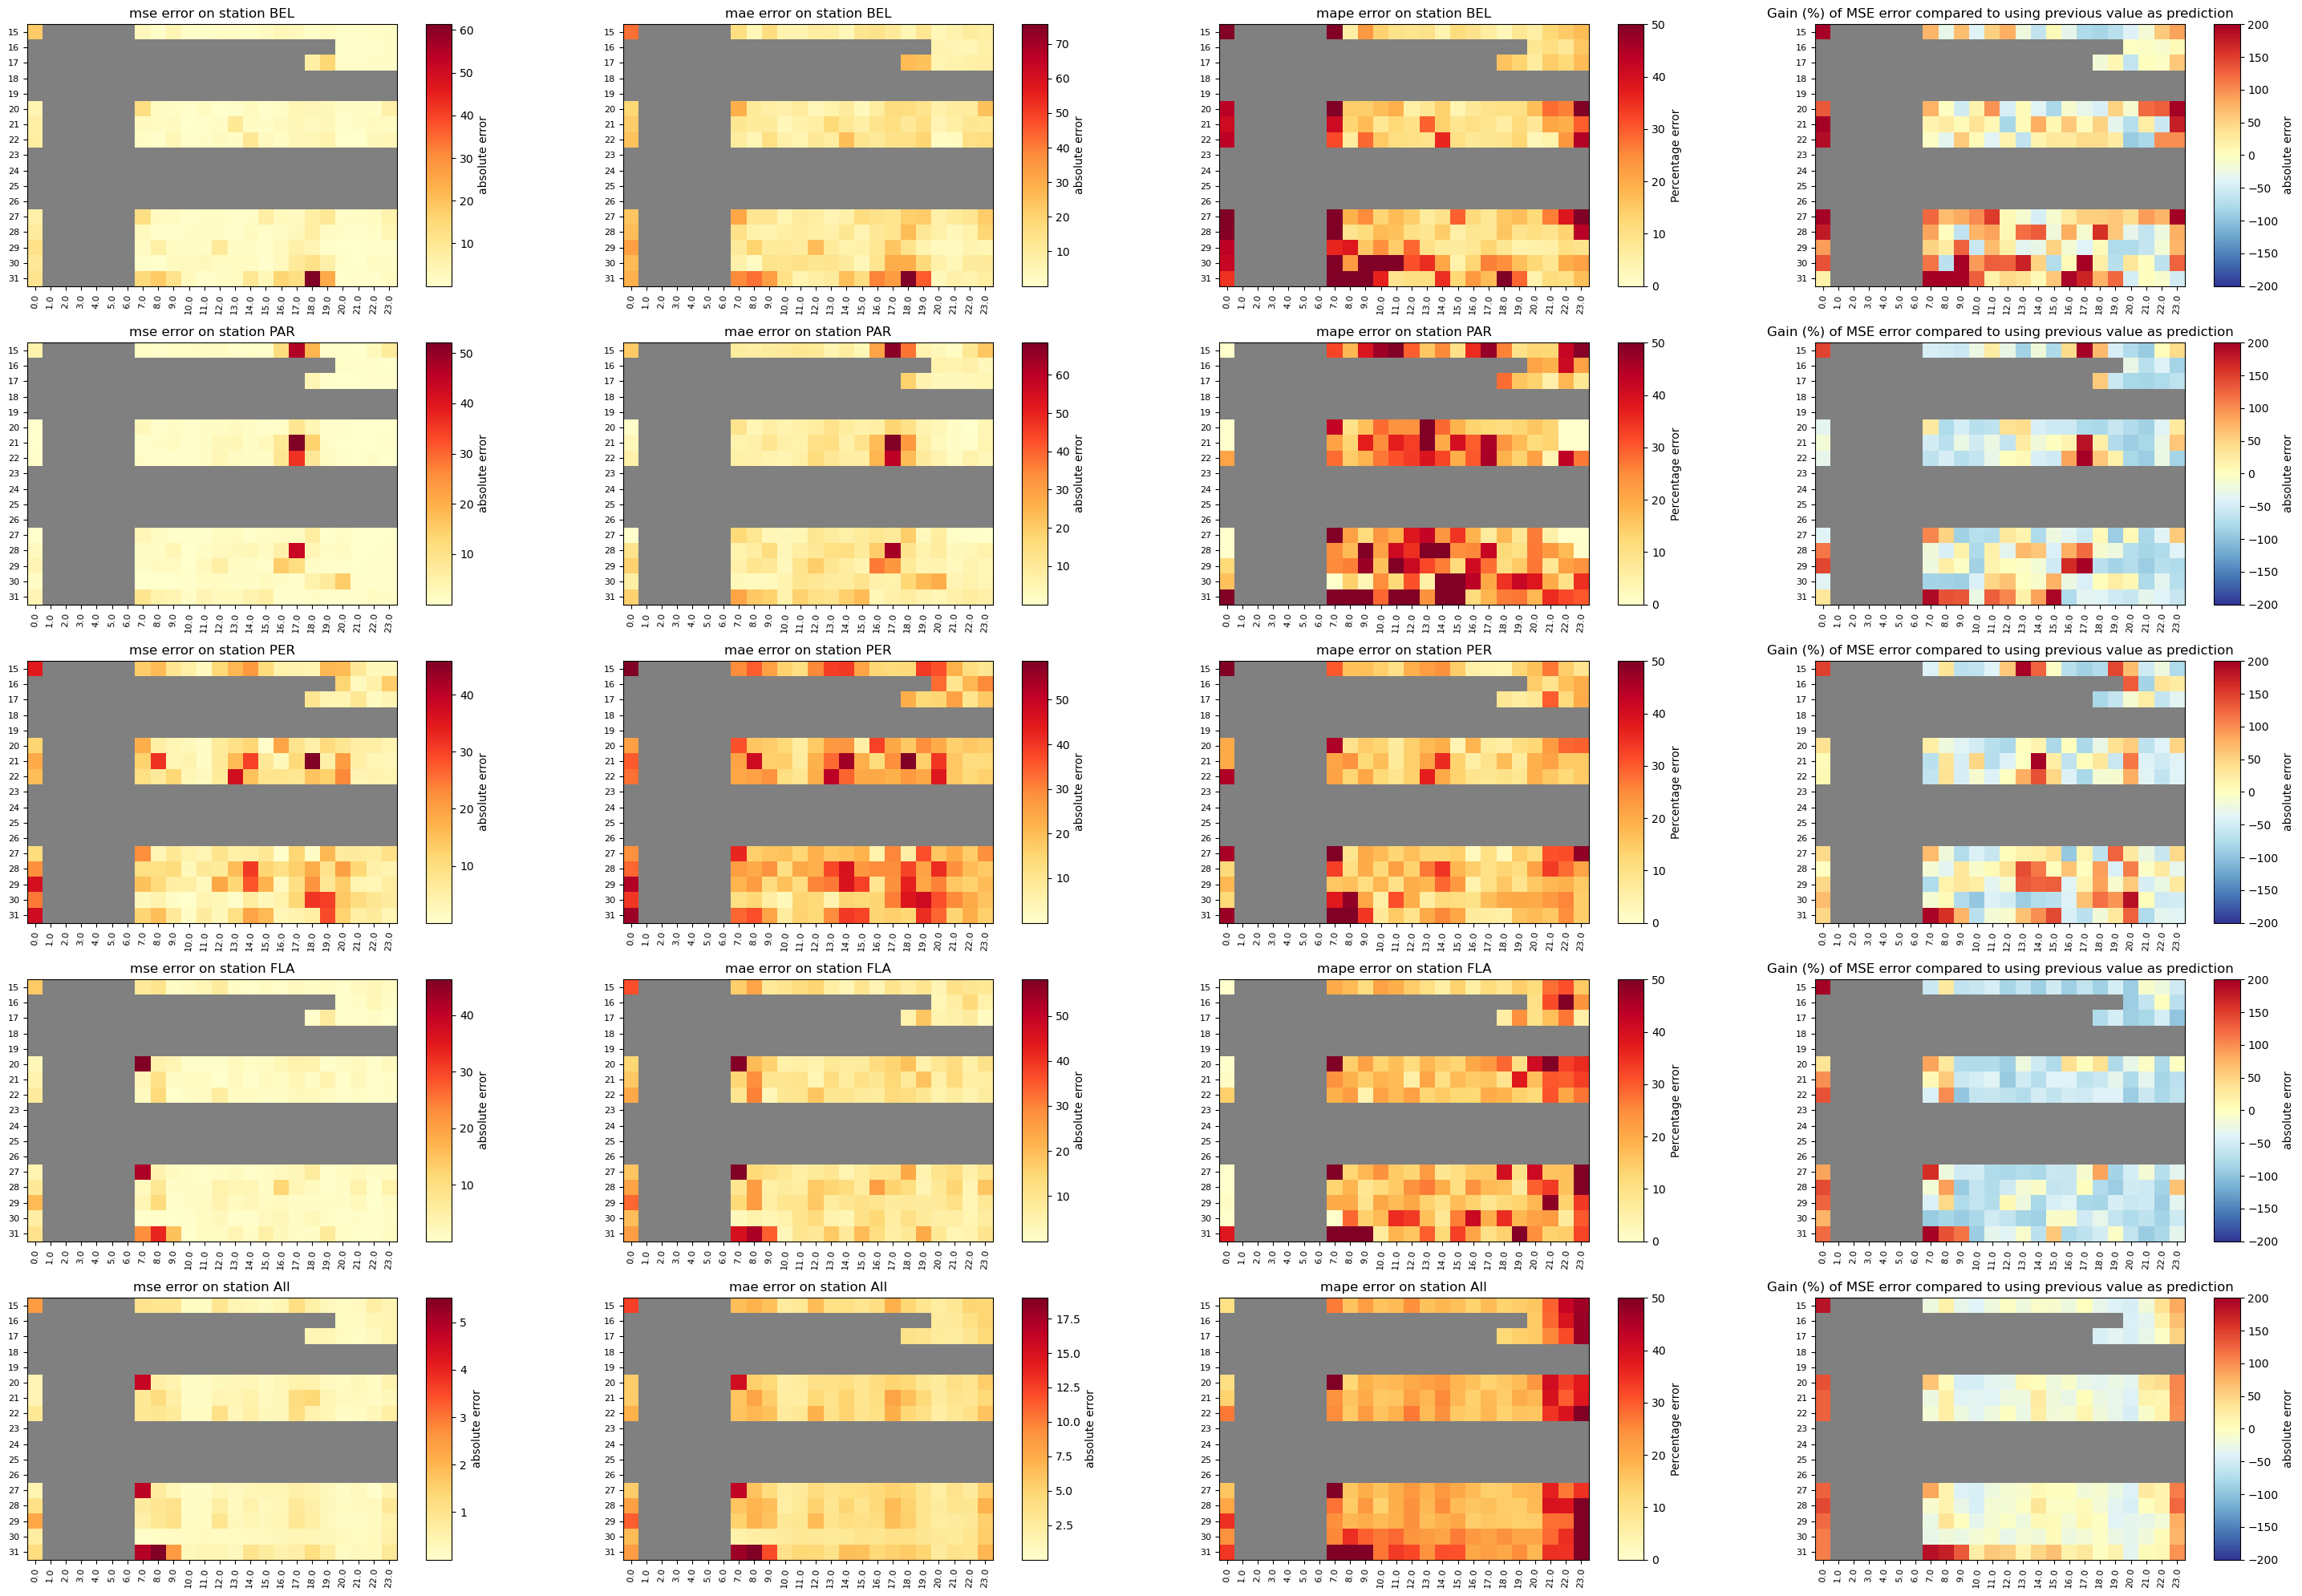

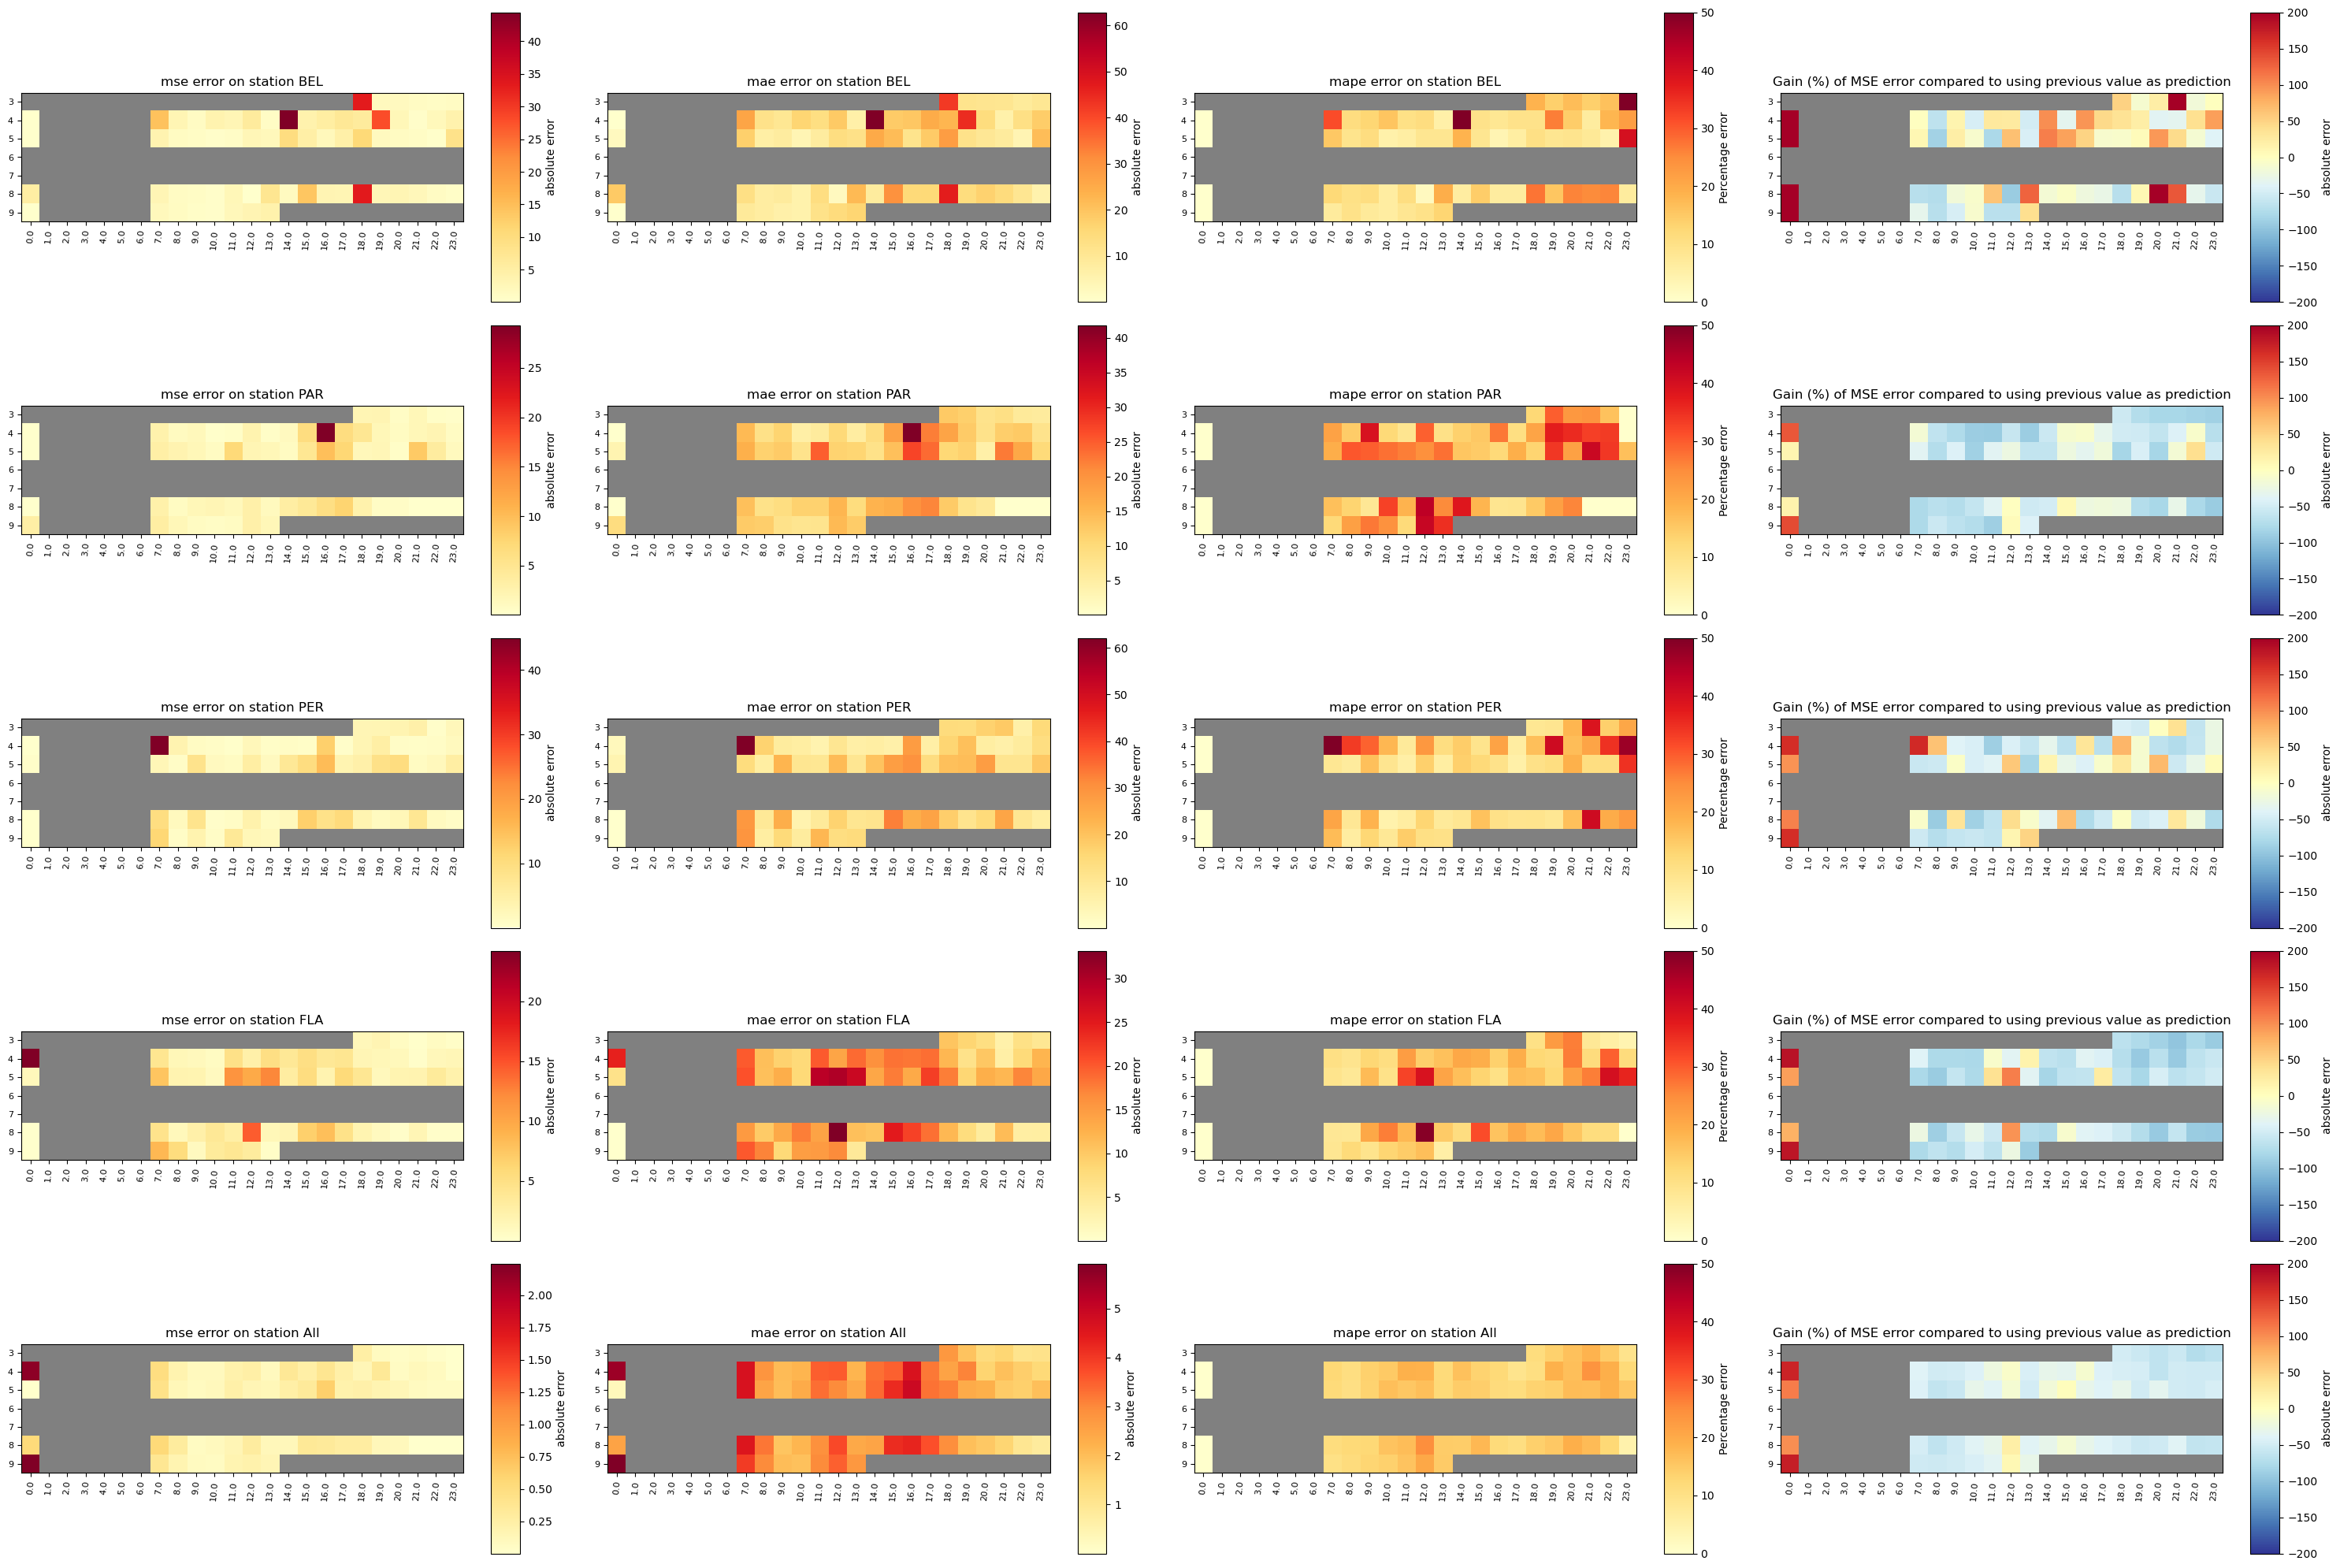

Trial id:  subway_in_netmob_POIs_STGCN_VariableSelectionNetwork_MSELoss_2025_01_07_23_12_41192

>>>> Load best CONFIG

Init Dataset:  torch.Size([7392, 40])
Number of Nan Value:  tensor(0)
Total Number of Elements:  295680 

U/Utarget size: torch.Size([3420, 40, 7])/torch.Size([3420, 40, 1]) Train/Valid/Test 2052 684 683
Spatial unit:  AMP
U/Utarget size: torch.Size([3420, 34, 7])/torch.Size([3420, 34, 1]) Train/Valid/Test 2052 684 683
Spatial unit:  BEL
U/Utarget size: torch.Size([3420, 36, 7])/torch.Size([3420, 36, 1]) Train/Valid/Test 2052 684 683
Spatial unit:  BRO
U/Utarget size: torch.Size([3420, 30, 7])/torch.Size([3420, 30, 1]) Train/Valid/Test 2052 684 683
Spatial unit:  COR
U/Utarget size: torch.Size([3420, 39, 7])/torch.Size([3420, 39, 1]) Train/Valid/Test 2052 684 683
Spatial unit:  CUI
U/Utarget size: torch.Size([3420, 67, 7])/torch.Size([3420, 67, 1]) Train/Valid/Test 2052 684 683
Spatial unit:  CUS
U/Utarget size: torch.Size([3420, 21, 7])/torch.Size([3420, 21, 1]) Train

/root/anaconda3/envs/pytorch-2.0.1/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:152: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


epoch: 0 
 min\epoch : 0.06
Estimated time for training: 4.7min 

Training Throughput:511.09 sequences per seconds
>>> Training complete in: 0:03:48.806420
>>> Training performance time: min 0.054533958435058594 avg 0.06078743934631348 seconds (+/- 0.004027943406812557)
>>> Loading performance time: min 0.002755403518676758 avg 0.04406496514550422 seconds (+/- 0.10206956813552352)
>>> Forward performance time: 0.022635692172254127 seconds (+/- 0.00100668232899057)
>>> Backward performance time: 0.032834927913728884 seconds (+/- 0.0035275183138754776)
>>> Plotting performance time: 4.265043470594618e-06 seconds (+/- 1.0649411125502763e-05)
>>> Saving performance time: 0.8517633957021377 seconds (+/- 0.15729773948944142)
>>> PI-tracking performance time: 3.7063251842151987e-06 seconds (+/- 1.0528403329529543e-06)
>>> Scheduler-update performance time: 4.383530279602667e-05 seconds (+/- 1.7899607045760535e-05)
>>> Peak Power during training: 111.169 W)
>>> Validation time: 0:00:00.227585


Loading BokehJS ...

Loading BokehJS ...

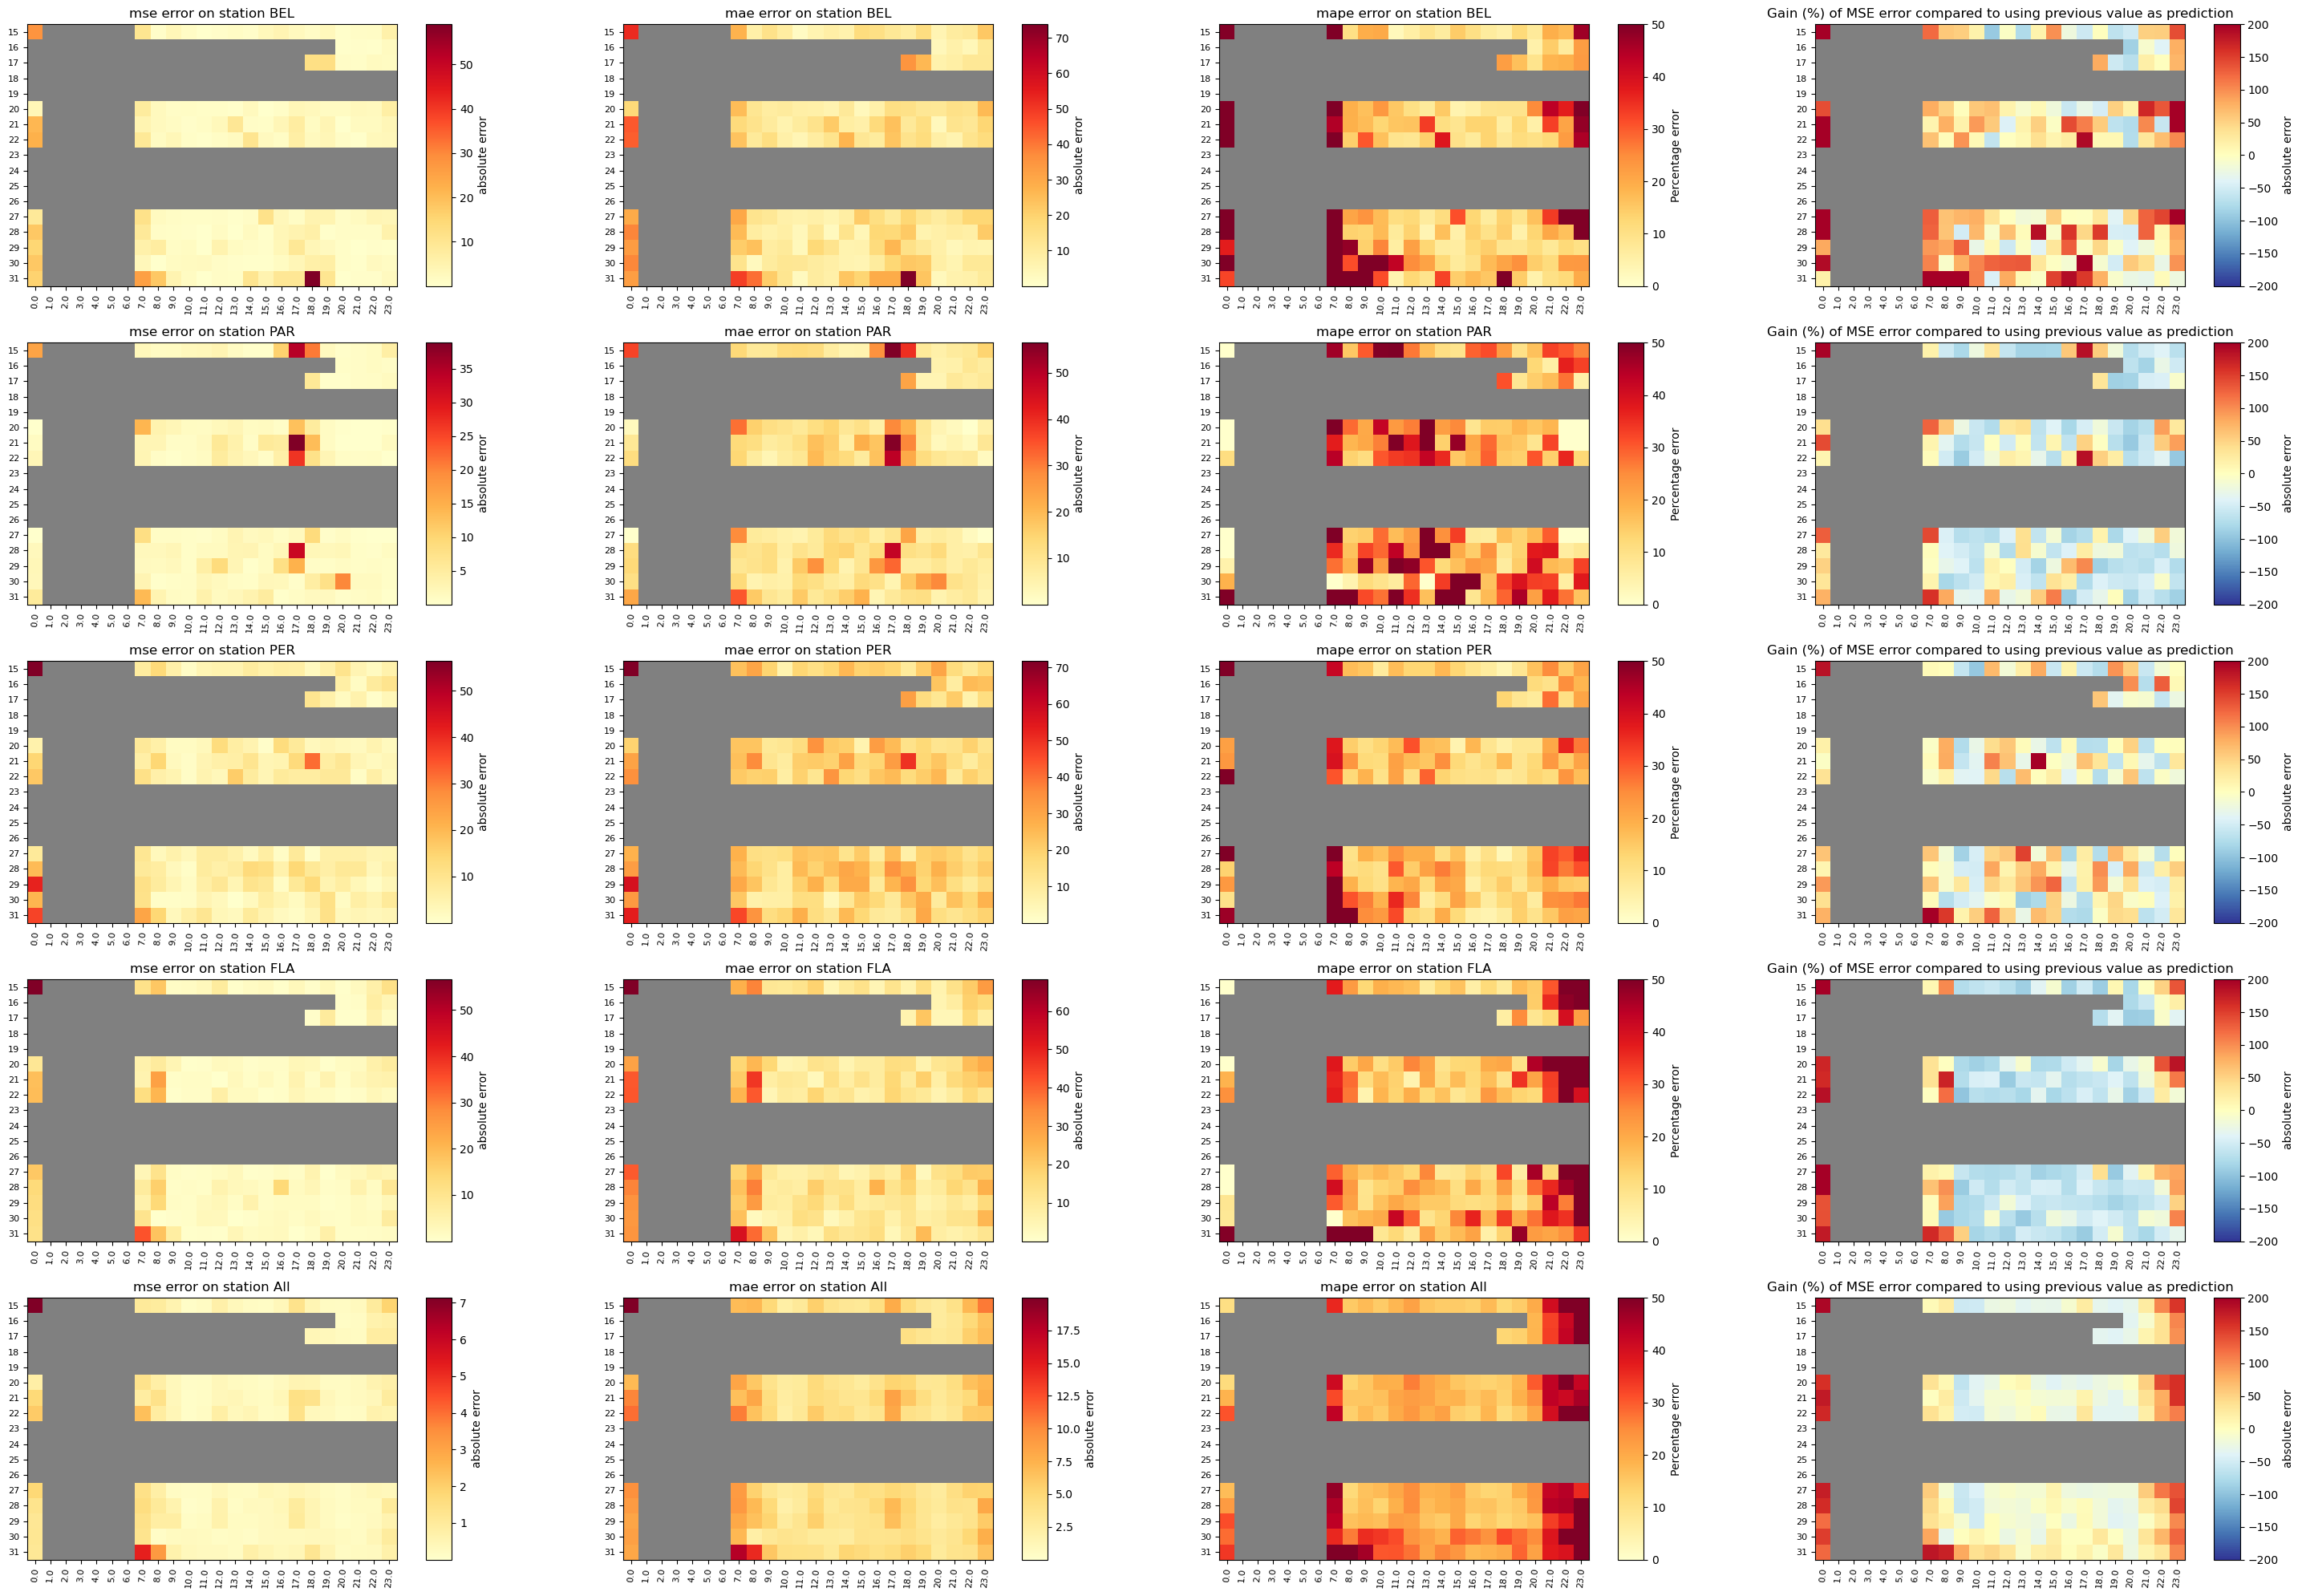

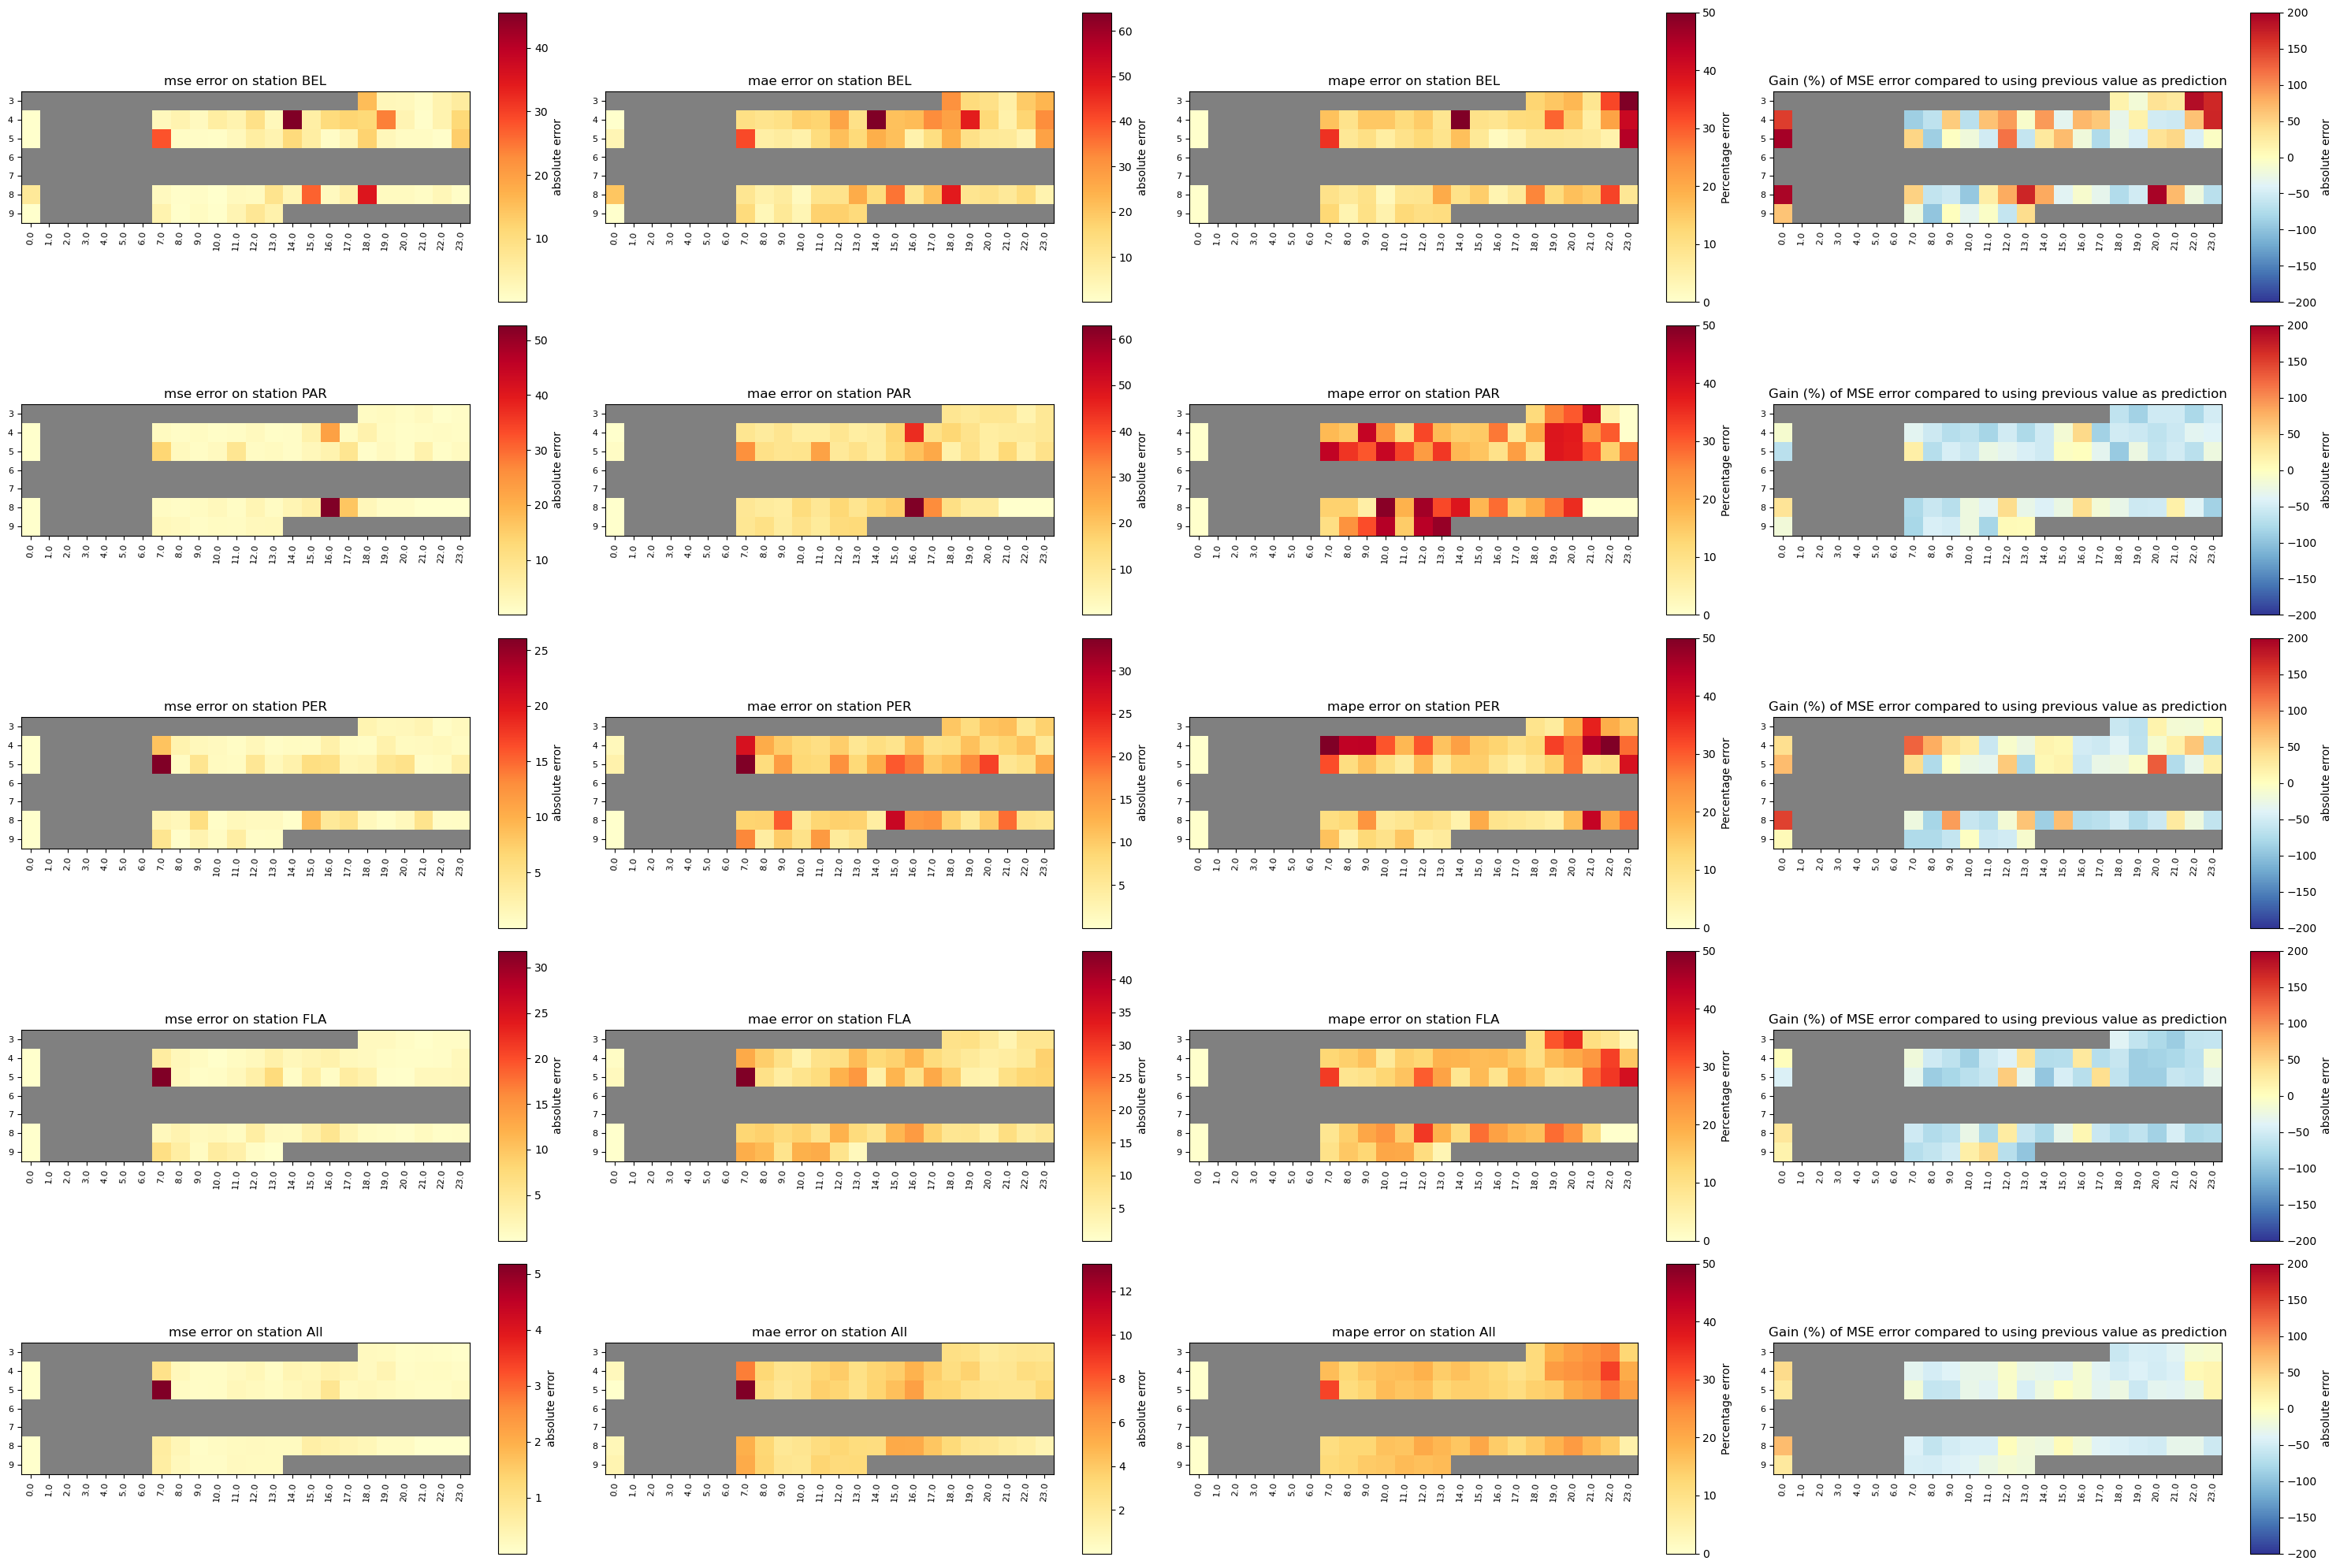

In [2]:
for trial_id in ['subway_in_STGCN_MSELoss_2025_01_06_08_00_94523',
                 "subway_in_subway_out_STGCN_VariableSelectionNetwork_MSELoss_2025_01_06_02_04_17963",
                 "subway_in_netmob_POIs_STGCN_VariableSelectionNetwork_MSELoss_2025_01_07_23_12_41192"]:

    print('Trial id: ',trial_id)
    args_best_model,_ = load_configuration(trial_id,load_config=True,epochs=None)

    station = ['BEL','PAR','PER','FLA']   # 'BON'  #'GER'
    training_mode_to_visualise = ['test','valid'] # ['test','valid','train']
    modification ={'keep_best_weights':True}
    #modification = {'epochs':1}

    (trainer,ds,ds_no_shuffle,args) = evaluate_config(args_best_model.model_name,args_best_model.dataset_names,args_best_model.dataset_for_coverage,
                                                    station = station,modification=modification,
                                                    training_mode_to_visualise=training_mode_to_visualise,
                                                    args_init =args_best_model,
                                                    fold_to_evaluate = [0])


    # Init
    for training_mode in training_mode_to_visualise:
        min_flow = 20  # Minimal Flow considered for MAPE, otherwise set error = 0
        limit_percentage_error = 200 # 300% plus mauvais que quand on se sert du previous 
        fig,axes = error_per_station_calendar_pattern(trainer,ds,training_mode,metrics = ['mse','mae','mape','previous_value'],
                                                    freq='1h',
                                                    min_flow=min_flow,
                                                    figsize = (30,5*len(station)),
                                                    limit_percentage_error = limit_percentage_error,
                                                    stations = station)

## Load config defined 'by hand' :

In [6]:
dataset_names = ["subway_in"] # ["subway_in","calendar"] # ["subway_in"] # ['data_bidon'] # ['METR_LA'] # ['PEMS_BAY']
dataset_for_coverage = ['subway_in','netmob_image_per_station'] #  ['data_bidon','netmob'] #  ['subway_in','netmob']  # ['METR_LA'] # ['PEMS_BAY']
model_name = 'STGCN'

station = ['BEL','PAR','AMP','FLA']   # 'BON'  #'GER'
# ...

modification = {'epochs' : 1, #100
                'lr':4e-4}
training_mode_to_visualise = ['test']

(trainer,ds,ds_no_shuffle,args) = evaluate_config(model_name,dataset_names,dataset_for_coverage,
                                                   station = station,modification=modification,training_mode_to_visualise=training_mode_to_visualise)

>>>>Model: STGCN; K_fold = 6; Loss function: MSE 



Init Dataset:  torch.Size([7392, 40])
Number of Nan Value:  tensor(0)
Total Number of Elements:  295680 

U/Utarget size: torch.Size([3420, 40, 7])/torch.Size([3420, 40, 1]) Train/Valid/Test 2052 684 683

>>>>>>> SELF args train/valid/test:  0.6 0.2 0.19999999999999996
>>>>>>> train/valid/test:  0.6 0.2 0.19999999999999996
first_train_date:  2019-03-17 00:00:00
last_train_date:  2019-05-01 15:00:00
first_predicted_train_date:  2019-03-18 00:00:00
last_predicted_train_date:  2019-05-01 15:15:00
first_test_date:  2019-05-14 00:30:00
last_test_date:  2019-05-31 23:30:00
first_predicted_test_date:  2019-05-15 00:30:00
last_predicted_test_date:  2019-05-31 23:45:00
----------------------------------------
Fold n°0

Init Dataset:  torch.Size([1183, 40])
Number of Nan Value:  tensor(0)
Total Number of Elements:  47320 

U/Utarget size: torch.Size([1087, 40, 7])/torch.Size([1087, 40, 1]) Train/Valid 815 271
Model size: 0.000GB
number of total parameters: 71713
number of trainable parameters: 

/root/anaconda3/envs/pytorch-2.0.1/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/root/anaconda3/envs/pytorch-2.0.1/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/root/anaconda3/envs/pytorch-2.0.1/lib/python3.10/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/root/anaconda3/envs/pytorch-2.0.1/lib/python3.10/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/root/anaconda3/envs/pytorch-2.0.1/lib/python3.10/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)



Init Dataset:  torch.Size([7392, 40])
Number of Nan Value:  tensor(0)
Total Number of Elements:  295680 

U/Utarget size: torch.Size([3420, 40, 7])/torch.Size([3420, 40, 1]) Train/Valid/Test 2052 684 683

>>>>>>> SELF args train/valid/test:  0.6 0.2 0.19999999999999996
>>>>>>> train/valid/test:  0.6 0.2 0.19999999999999996
first_train_date:  2019-03-17 00:00:00
last_train_date:  2019-05-01 15:00:00
first_predicted_train_date:  2019-03-18 00:00:00
last_predicted_train_date:  2019-05-01 15:15:00
first_test_date:  2019-05-14 00:30:00
last_test_date:  2019-05-31 23:30:00
first_predicted_test_date:  2019-05-15 00:30:00
last_predicted_test_date:  2019-05-31 23:45:00
----------------------------------------
Fold n°0

Init Dataset:  torch.Size([1183, 40])
Number of Nan Value:  tensor(0)
Total Number of Elements:  47320 

U/Utarget size: torch.Size([1087, 40, 7])/torch.Size([1087, 40, 1]) Train/Valid 815 271


Loading BokehJS ...